# Analyses for Online Coding Community Survey Data

By Michael A. Madaio, for the United Nations University Institute for Computing and Society
<br> June, 2018

## Overview

#### RQ1. Extent of Gender Gap in OCC

#### RQ2. Extent of OCC's welcome environment towards women

#### RQ3. Women's Leadership in OCC

## Setup

In [1]:
### Load required packages

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas.tools.plotting
import seaborn as sns
import matplotlib
%matplotlib inline
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

import string
from collections import Counter

plt.style.use('seaborn')

import plotly.offline as offline
offline.init_notebook_mode(True)
import plotly.graph_objs as go
#plt.style.use('ggplot')
pd.options.display.max_rows =300
plt.rc('ytick',labelsize=12)
plt.rc('ytick',labelsize=12)
plt.rc('axes',labelsize=12)
pd.options.display.float_format = '{:.2f}%'.format # add % to all floats, all floats here are percentages

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\michael.madaio\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
## For making pretty tables when nbconverting to latex

pd.set_option('display.notebook_repr_html', True)

def _repr_latex_(self):
    return "\centering{%s}" % self.to_latex()

pd.DataFrame._repr_latex_ = _repr_latex_  # monkey patch pandas DataFrame

In [3]:
## Set environment path

root = "C:\\Users\michael.madaio"
path = "\Documents\EQUALS\OCC_CaseStudy"

folder = root + path
os.chdir(folder)

data_folder = folder + "\Data"
output_folder = folder + "\Analysis Output"
save_images = output_folder + "\Plots"
save_maps = output_folder + "\Maps"

### Load data

In [4]:
## Load data

## Load StackOverflow data
so_values = pd.read_csv('{0}\survey_results_public.csv'.format(data_folder), na_values=['#NULL!', 'nan'], low_memory=False)

## Load GitHub data
survey_df = pd.read_csv("{0}\survey_data.csv".format(data_folder))

## Load HackerRank data
codebook = pd.read_csv('{0}\HackerRank-Developer-Survey-2018-Codebook.csv'.format(data_folder))
numeric_mapping = pd.read_csv('{0}\HackerRank-Developer-Survey-2018-Numeric-Mapping.csv'.format(data_folder))
numeric = pd.read_csv('{0}\HackerRank-Developer-Survey-2018-Numeric.csv'.format(data_folder), na_values=['#NULL!', 'nan'], low_memory=False)
hr_values = pd.read_csv('{0}\HackerRank-Developer-Survey-2018-Values.csv'.format(data_folder), na_values=['#NULL!', 'nan'], low_memory=False)



## Load Country-Region data
country_mapping = pd.read_csv('{0}\Country-Region-Mapping.csv'.format(data_folder),encoding='latin-1')

### Clean data

In [5]:
## StackOverflow
# ???


## Github: filter out self-selected respondents from other sources
survey_complete_df = survey_df.query("POPULATION == 'github'")


## HackerRank: clean items
codebook.columns = ['fieldname', 'question', 'notes']
codebook.set_index('fieldname', inplace=True);
numeric_mapping.set_index('Data Field', inplace=True)
numeric.q1AgeBeginCoding = numeric.q1AgeBeginCoding.astype(float)
numeric.q2Age = numeric.q2Age.astype(float)
numeric = numeric.fillna(-1)


## Replace NAs with Not provided
so_values = so_values.fillna('Not provided')
hr_values = hr_values.fillna('Not provided')
gh_values = survey_df.fillna('Not provided')

### Preview data

#### StackOverflow

In [6]:
## Print number of respondents
print("Total respondents:", len(so_values), "\n")

## Print example values for columns
#print(so_values.head())

## Print list of column names
print(so_values.columns.ravel())

## Print all columns
#so_values[0:3].transpose()

Total respondents: 98855 

['Respondent' 'Hobby' 'OpenSource' 'Country' 'Student' 'Employment'
 'FormalEducation' 'UndergradMajor' 'CompanySize' 'DevType' 'YearsCoding'
 'YearsCodingProf' 'JobSatisfaction' 'CareerSatisfaction' 'HopeFiveYears'
 'JobSearchStatus' 'LastNewJob' 'AssessJob1' 'AssessJob2' 'AssessJob3'
 'AssessJob4' 'AssessJob5' 'AssessJob6' 'AssessJob7' 'AssessJob8'
 'AssessJob9' 'AssessJob10' 'AssessBenefits1' 'AssessBenefits2'
 'AssessBenefits3' 'AssessBenefits4' 'AssessBenefits5' 'AssessBenefits6'
 'AssessBenefits7' 'AssessBenefits8' 'AssessBenefits9' 'AssessBenefits10'
 'AssessBenefits11' 'JobContactPriorities1' 'JobContactPriorities2'
 'JobContactPriorities3' 'JobContactPriorities4' 'JobContactPriorities5'
 'JobEmailPriorities1' 'JobEmailPriorities2' 'JobEmailPriorities3'
 'JobEmailPriorities4' 'JobEmailPriorities5' 'JobEmailPriorities6'
 'JobEmailPriorities7' 'UpdateCV' 'Currency' 'Salary' 'SalaryType'
 'ConvertedSalary' 'CurrencySymbol' 'CommunicationTools'
 'TimeFull

#### GitHub

In [7]:
## Print number of respondents
print("Total respondents:", len(gh_values), "\n")

## Print example values for columns
#print(gh_values.head())

## Print list of column names
print(gh_values.columns.ravel())

## Print example values for columns
#gh_values[0:3].transpose()

Total respondents: 6029 

['RESPONSE.ID' 'DATE.SUBMITTED' 'STATUS' 'PARTICIPATION.TYPE.FOLLOW'
 'PARTICIPATION.TYPE.USE.APPLICATIONS'
 'PARTICIPATION.TYPE.USE.DEPENDENCIES' 'PARTICIPATION.TYPE.CONTRIBUTE'
 'PARTICIPATION.TYPE.OTHER' 'CONTRIBUTOR.TYPE.CONTRIBUTE.CODE'
 'CONTRIBUTOR.TYPE.CONTRIBUTE.DOCS' 'CONTRIBUTOR.TYPE.PROJECT.MAINTENANCE'
 'CONTRIBUTOR.TYPE.FILE.BUGS' 'CONTRIBUTOR.TYPE.FEATURE.REQUESTS'
 'CONTRIBUTOR.TYPE.COMMUNITY.ADMIN' 'EMPLOYMENT.STATUS'
 'PROFESSIONAL.SOFTWARE' 'FUTURE.CONTRIBUTION.INTEREST'
 'FUTURE.CONTRIBUTION.LIKELIHOOD' 'OSS.USER.PRIORITIES.LICENSE'
 'OSS.USER.PRIORITIES.CODE.OF.CONDUCT'
 'OSS.USER.PRIORITIES.CONTRIBUTING.GUIDE' 'OSS.USER.PRIORITIES.CLA'
 'OSS.USER.PRIORITIES.ACTIVE.DEVELOPMENT'
 'OSS.USER.PRIORITIES.RESPONSIVE.MAINTAINERS'
 'OSS.USER.PRIORITIES.WELCOMING.COMMUNITY'
 'OSS.USER.PRIORITIES.WIDESPREAD.USE' 'OSS.CONTRIBUTOR.PRIORITIES.LICENSE'
 'OSS.CONTRIBUTOR.PRIORITIES.CODE.OF.CONDUCT'
 'OSS.CONTRIBUTOR.PRIORITIES.CONTRIBUTING.GUIDE'
 'OSS.C

### Create lists of variables for bulk analysis

In [8]:
participation_type_vars = ['PARTICIPATION.TYPE.FOLLOW',
       'PARTICIPATION.TYPE.USE.APPLICATIONS',
       'PARTICIPATION.TYPE.USE.DEPENDENCIES', 'PARTICIPATION.TYPE.CONTRIBUTE',
       'PARTICIPATION.TYPE.OTHER']

contrib_type_vars = ['CONTRIBUTOR.TYPE.CONTRIBUTE.CODE',
       'CONTRIBUTOR.TYPE.CONTRIBUTE.DOCS',
       'CONTRIBUTOR.TYPE.PROJECT.MAINTENANCE', 'CONTRIBUTOR.TYPE.FILE.BUGS',
       'CONTRIBUTOR.TYPE.FEATURE.REQUESTS', 'CONTRIBUTOR.TYPE.COMMUNITY.ADMIN']

contrib_other_vars = ['EMPLOYMENT.STATUS', 'PROFESSIONAL.SOFTWARE',
       'FUTURE.CONTRIBUTION.INTEREST', 'FUTURE.CONTRIBUTION.LIKELIHOOD']

contrib_ident_vars = participation_type_vars + contrib_type_vars + contrib_other_vars

In [9]:
user_pri_vars = ['OSS.USER.PRIORITIES.LICENSE', 'OSS.USER.PRIORITIES.CODE.OF.CONDUCT',
       'OSS.USER.PRIORITIES.CONTRIBUTING.GUIDE', 'OSS.USER.PRIORITIES.CLA',
       'OSS.USER.PRIORITIES.ACTIVE.DEVELOPMENT',
       'OSS.USER.PRIORITIES.RESPONSIVE.MAINTAINERS',
       'OSS.USER.PRIORITIES.WELCOMING.COMMUNITY',
       'OSS.USER.PRIORITIES.WIDESPREAD.USE']

contrib_pri_vars = ['OSS.CONTRIBUTOR.PRIORITIES.LICENSE',
       'OSS.CONTRIBUTOR.PRIORITIES.CODE.OF.CONDUCT',
       'OSS.CONTRIBUTOR.PRIORITIES.CONTRIBUTING.GUIDE',
       'OSS.CONTRIBUTOR.PRIORITIES.CLA',
       'OSS.CONTRIBUTOR.PRIORITIES.ACTIVE.DEVELOPMENT',
       'OSS.CONTRIBUTOR.PRIORITIES.RESPONSIVE.MAINTAINERS',
       'OSS.CONTRIBUTOR.PRIORITIES.WELCOMING.COMMUNITY',
       'OSS.CONTRIBUTOR.PRIORITIES.WIDESPREAD.USE']

oss_values_vars = [ 'SEEK.OPEN.SOURCE',
       'OSS.UX', 'OSS.SECURITY', 'OSS.STABILITY', 'INTERNAL.EFFICACY',
       'EXTERNAL.EFFICACY', 'OSS.IDENTIFICATION']

user_values_vars = ['USER.VALUES.STABILITY',
       'USER.VALUES.INNOVATION', 'USER.VALUES.REPLICABILITY',
       'USER.VALUES.COMPATIBILITY', 'USER.VALUES.SECURITY', 'USER.VALUES.COST',
       'USER.VALUES.TRANSPARENCY', 'USER.VALUES.USER.EXPERIENCE',
       'USER.VALUES.CUSTOMIZABILITY', 'USER.VALUES.SUPPORT',
       'USER.VALUES.TRUSTED.PRODUCER']

values_pri_vars = user_pri_vars + contrib_pri_vars + user_values_vars + oss_values_vars 

In [10]:
privacy_transp_vars = ['TRANSPARENCY.PRIVACY.BELIEFS',
       'INFO.AVAILABILITY', 'INFO.JOB',
       'TRANSPARENCY.PRIVACY.PRACTICES.GENERAL',
       'TRANSPARENCY.PRIVACY.PRACTICES.OSS']

In [11]:
help_vars = ['RECEIVED.HELP', 'FIND.HELPER',
       'HELPER.PRIOR.RELATIONSHIP', 'RECEIVED.HELP.TYPE', 'PROVIDED.HELP',
       'FIND.HELPEE', 'HELPEE.PRIOR.RELATIONSHIP', 'PROVIDED.HELP.TYPE']

In [12]:
paid_work_vars = ['OSS.AS.JOB',
       'OSS.AT.WORK', 'OSS.IP.POLICY', 'EMPLOYER.POLICY.APPLICATIONS',
       'EMPLOYER.POLICY.DEPENDENCIES', 'OSS.HIRING']

In [13]:
discouraging_vars = ['DISCOURAGING.BEHAVIOR.LACK.OF.RESPONSE',
       'DISCOURAGING.BEHAVIOR.REJECTION.WOUT.EXPLANATION',
       'DISCOURAGING.BEHAVIOR.DISMISSIVE.RESPONSE',
       'DISCOURAGING.BEHAVIOR.BAD.DOCS', 'DISCOURAGING.BEHAVIOR.CONFLICT',
       'DISCOURAGING.BEHAVIOR.UNWELCOMING.LANGUAGE']

In [14]:
demographic_vars = ['IMMIGRATION',
       'MINORITY.HOMECOUNTRY', 'MINORITY.CURRENT.COUNTRY', 'GENDER',
       'TRANSGENDER.IDENTITY', 'SEXUAL.ORIENTATION', 'WRITTEN.ENGLISH', 'AGE',
       'FORMAL.EDUCATION', 'PARENTS.FORMAL.EDUCATION',
       'AGE.AT.FIRST.COMPUTER.INTERNET', 'LOCATION.OF.FIRST.COMPUTER.INTERNET',
       'PARTICIPATION.TYPE.ANY.REPONSE', 'POPULATION', 'OFF.SITE.ID',
       'TRANSLATED']

In [15]:
survey_vars = [contrib_ident_vars, values_pri_vars, privacy_transp_vars, \
               help_vars, paid_work_vars, discouraging_vars, demographic_vars]

#### HackerRank

In [16]:
## Print number of respondents
print("Total respondents:", len(hr_values), "\n")

## Print example values for columns
#print(hr_values.head())

## Print list of column names
print(hr_values.columns.ravel())

## Print example values for columns
#hr_values[0:3].transpose()

Total respondents: 25090 

['RespondentID' 'StartDate' 'EndDate' 'CountryNumeric2' 'q1AgeBeginCoding'
 'q2Age' 'q3Gender' 'q4Education' 'q0004_other' 'q5DegreeFocus'
 'q0005_other' 'q6LearnCodeUni' 'q6LearnCodeSelfTaught'
 'q6LearnCodeAccelTrain' 'q6LearnCodeDontKnowHowToYet' 'q6LearnCodeOther'
 'q0006_other' 'q7Level1' 'q8JobLevel' 'q0008_other' 'q8Student'
 'q9CurrentRole' 'q0009_other' 'q10Industry' 'q0010_other'
 'q12JobCritPrefTechStack' 'q12JobCritCompMission' 'q12JobCritCompCulture'
 'q12JobCritWorkLifeBal' 'q12JobCritCompensation' 'q12JobCritProximity'
 'q12JobCritPerks' 'q12JobCritSmartPeopleTeam'
 'q12JobCritImpactwithProduct' 'q12JobCritInterestProblems'
 'q12JobCritFundingandValuation' 'q12JobCritStability'
 'q12JobCritProfGrowth' 'q12JobCritOther' 'q0012_other'
 'q13EmpMeasWhiteboard' 'q13EmpMeasHackerRank'
 'q13EmpMeasOtherCodingChallenge' 'q13EmpMeasTechPhoneInt'
 'q13EmpMeasTakeHomeProject' 'q13EmpMeasResume' 'q13EmpMeasPastWork'
 'q13EmpMeasOther' 'q0013_other' 'q14Goo

# Research Questions

## RQ1: What is the extent of the gender gap in software developers' participation in “online coding communities”?

#### RQ1a: What is the gender gap in survey respondents on 3 exemplary online coding communities?

#### 1.1. Clean gender data

In [17]:
## StackOverflow

print("StackOverflow: \n")

print(so_values['Gender'].value_counts(), "\n")

so_values.loc[(so_values["Gender"].str.contains('Non-binary')), "Gender"]='Non-binary'
so_values.loc[(so_values["Gender"].str.contains('Female;Male')), "Gender"]='Non-binary'
so_values.loc[(so_values["Gender"].str.contains('Transgender')), "Gender"]='Transgender'

so_values.loc[(so_values["Gender"] == ('Transgender')) | (so_values["Gender"] == ('Non-binary')), "Gender"]='Non-binary or Transgender'

so_female = so_values[so_values['Gender'] == "Female"]
so_male = so_values[so_values['Gender'] == "Male"]

so_gender = so_values[(so_values['Gender'] == "Male") | (so_values["Gender"] == "Female")]

print(so_gender["Gender"].value_counts(normalize=True)*100)





StackOverflow: 

Male                                                                         59458
Not provided                                                                 34386
Female                                                                        4025
Non-binary, genderqueer, or gender non-conforming                              284
Female;Transgender                                                             145
Male;Non-binary, genderqueer, or gender non-conforming                         128
Transgender                                                                    105
Female;Male                                                                     98
Transgender;Non-binary, genderqueer, or gender non-conforming                   51
Female;Non-binary, genderqueer, or gender non-conforming                        50
Female;Male;Transgender;Non-binary, genderqueer, or gender non-conforming       50
Male;Transgender                                                      

In [18]:
## GitHub

print("GitHub: \n")

gh_values['GENDER'] = gh_values['GENDER'].replace("Man", "Male")
gh_values['GENDER'] = gh_values['GENDER'].replace("Woman", "Female")

print(gh_values['GENDER'].value_counts(),"\n")

gh_female = gh_values[gh_values['GENDER'] == "Female"]
gh_male = gh_values[gh_values['GENDER'] == "Male"]

gh_gender = gh_values[(gh_values['GENDER'] == "Male") | (gh_values["GENDER"] == "Female")]

print(gh_gender["GENDER"].value_counts(normalize=True)*100)

GitHub: 

Male                    3387
Not provided            2305
Prefer not to say        173
Female                   125
Non-binary  or Other      39
Name: GENDER, dtype: int64 

Male     96.44%
Female    3.56%
Name: GENDER, dtype: float64


In [19]:
## HackerRank

print("HackerRank: \n")

print(hr_values['q3Gender'].value_counts(), "\n")

hr_female = hr_values[hr_values['q3Gender'] == "Female"]
hr_male = hr_values[hr_values['q3Gender'] == "Male"]

hr_gender = hr_values[(hr_values['q3Gender'] == "Male") | (hr_values["q3Gender"] == "Female")]


print(hr_gender['q3Gender'].value_counts())

HackerRank: 

Male            20774
Female           4122
Non-Binary        125
Not provided       69
Name: q3Gender, dtype: int64 

Male      20774
Female     4122
Name: q3Gender, dtype: int64


### 1.2. Gender Distribution Barcharts

#### 1.2.1. StackOverflow

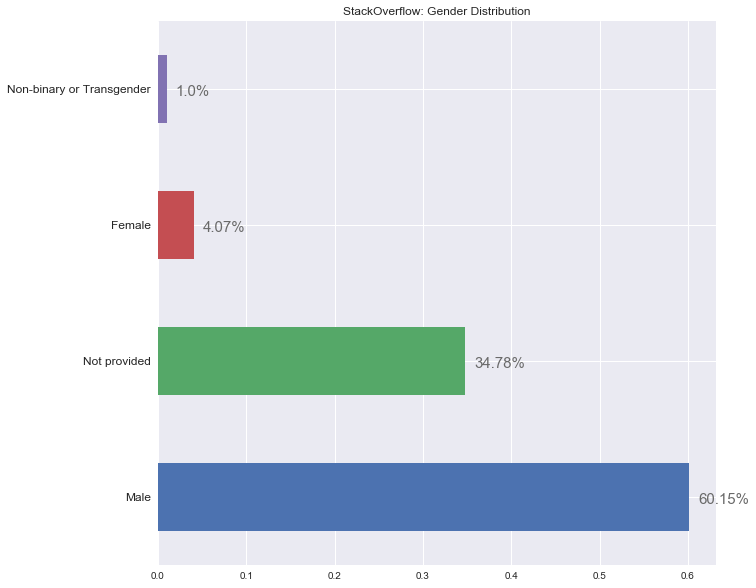

In [20]:
ax = so_values['Gender'].value_counts(normalize=True).plot(kind='barh',figsize=(10,10), title="StackOverflow: Gender Distribution")

fig = ax.get_figure()

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar labels using above list
total = sum(totals)

# set individual bar labels using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_width()+.01, i.get_y()+0.2, \
            str(round((i.get_width()*100), 2))+'%', fontsize=15,
                color='dimgrey')
    
name = "SO_gender_barplot.jpg"
save_location = save_images + "\\" + name
fig.savefig(save_location)

#### 1.2.2. GitHub

In [25]:
print(ax.patches)

[<matplotlib.patches.Rectangle object at 0x00000000284BB4E0>, <matplotlib.patches.Rectangle object at 0x00000000284BB7F0>, <matplotlib.patches.Rectangle object at 0x00000000284BBB38>, <matplotlib.patches.Rectangle object at 0x00000000284BBE80>]


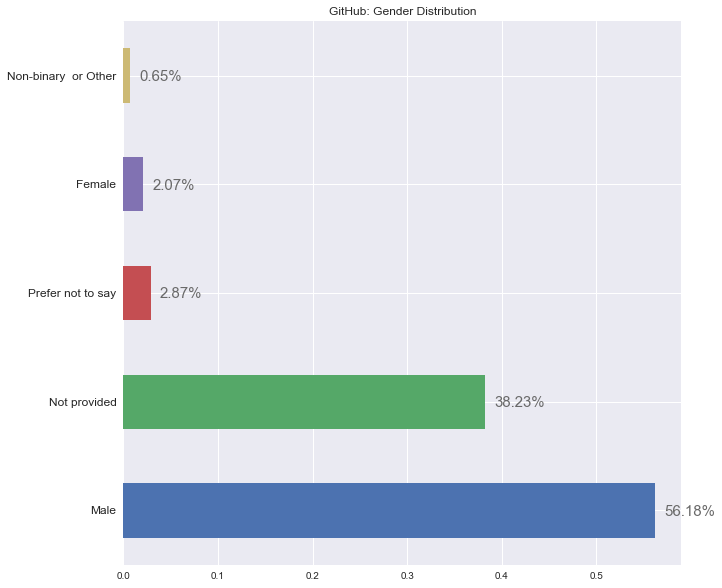

In [146]:
ax = gh_values['GENDER'].value_counts(normalize=True).plot(kind='barh',figsize=(10,10), title="GitHub: Gender Distribution")

fig = ax.get_figure()

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar labels using above list
total = sum(totals)

# set individual bar labels using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_width()+.01, i.get_y()+0.2, \
            str(round((i.get_width())*100, 2))+'%', fontsize=15,
                color='dimgrey')
    
name = "GH_gender_barplot.jpg"
save_location = save_images + "\\" + name
fig.savefig(save_location)

#### 1.2.3. HackerRank

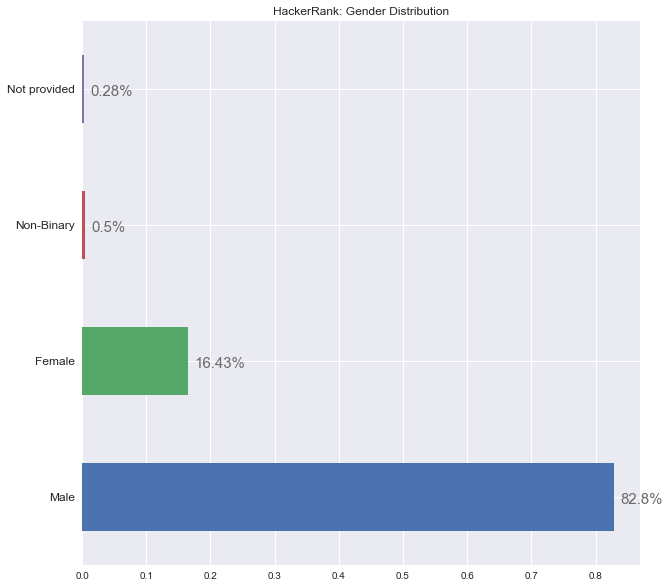

In [21]:
ax = hr_values['q3Gender'].value_counts(normalize=True).plot(kind='barh',figsize=(10,10), title="HackerRank: Gender Distribution")

fig = ax.get_figure()

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar labels using above list
total = sum(totals)

# set individual bar labels using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_width()+.01, i.get_y()+0.2, \
            str(round((i.get_width())*100, 2))+'%', fontsize=15,
                color='dimgrey')
    
name = "HR_gender_barplot.jpg"
save_location = save_images + "\\" + name
fig.savefig(save_location)

#### 1.3. Gender Percentage Table

In [28]:
# so_values_dev = so_values[(so_values["DevType"] != "Student") & (so_values["DevType"] != "Not provided")]
# hr_values_dev = hr_values[(hr_values["q8JobLevel"] != "Student") & (hr_values["q8JobLevel"] != "Not provided")]
# gh_values_dev = gh_values[(gh_values["EMPLOYMENT.STATUS"] == "Employed full time") | (gh_values["EMPLOYMENT.STATUS"] == "Employed part time")]


In [30]:
## StackOverflow

so_female_perc = so_values['Gender'].value_counts(normalize=True).rename_axis('unique_values').reset_index(name='counts')
so_female_perc = so_female_perc[so_female_perc["unique_values"]=="Female"]
so_female_perc = so_female_perc["counts"]*100

## Github
gh_female_perc = gh_values['GENDER'].value_counts(normalize=True).rename_axis('unique_values').reset_index(name='counts')
gh_female_perc = gh_female_perc[gh_female_perc["unique_values"]=="Female"]
gh_female_perc = gh_female_perc["counts"]*100

## HackerRank
hr_female_perc = hr_values['q3Gender'].value_counts(normalize=True).rename_axis('unique_values').reset_index(name='counts')
hr_female_perc = hr_female_perc[hr_female_perc["unique_values"]=="Female"]
hr_female_perc = hr_female_perc["counts"]*100

# Print as single table
df = pd.DataFrame({"Dataframe":["GitHub", "StackOverflow", "HackerRank"], "Percent Female":[gh_female_perc.values[0], so_female_perc.values[0], hr_female_perc.values[0]]})
df

,Dataframe,Percent Female
0,GitHub,2.07%
1,StackOverflow,4.07%
2,HackerRank,16.43%


#### RQ1b: How does the nature of women’s participation in online coding communities differ from men’s?

#### 1.4. StackOverflow Participation

#### 1.4.1. SO: Code as a Hobby

In [31]:
print("Women  \n \n", so_female["Hobby"].value_counts(normalize=True)*100, sep="")

Women  
 
Yes   67.01%
No    32.99%
Name: Hobby, dtype: float64


In [32]:
print("Men \n \n", so_male["Hobby"].value_counts(normalize=True)*100, sep="")

Men 
 
Yes   82.85%
No    17.15%
Name: Hobby, dtype: float64


##### Smaller share of women on SO (67%) code as a hobby than men (82%)

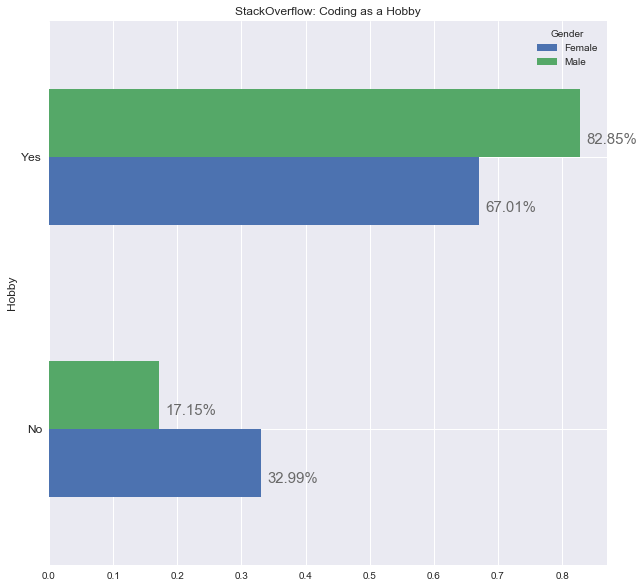

In [33]:
## Coding as a hobby

ax = so_gender.groupby("Gender")['Hobby'].value_counts(normalize=True).unstack(0).plot(kind='barh',figsize=(10,10), title="StackOverflow: Coding as a Hobby")

fig = ax.get_figure()

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar labels using above list
total = sum(totals)

# set individual bar labels using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_width()+.01, i.get_y()+0.05, \
            str(round((i.get_width()*100), 2))+'%', fontsize=15,
                color='dimgrey')
    
name = "SO_hobby_barplot.jpg"
save_location = save_images + "\\" + name
fig.savefig(save_location)

#### 1.4.2. SO: Contribute to open source

In [34]:
print("Women  \n \n", so_female["OpenSource"].value_counts(normalize=True)*100, sep="")

Women  
 
No    69.59%
Yes   30.41%
Name: OpenSource, dtype: float64


In [35]:
print("Men \n \n", so_male["OpenSource"].value_counts(normalize=True)*100, sep="")

Men 
 
No    54.78%
Yes   45.22%
Name: OpenSource, dtype: float64


##### Smaller share of women on SO (30%) contribute to open source than men (45%)

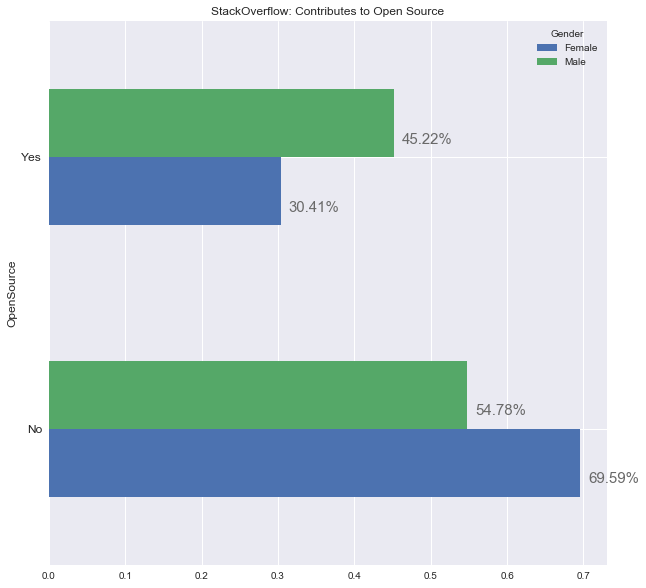

In [36]:
## Contribution to open source

ax = so_gender.groupby("Gender")['OpenSource'].value_counts(normalize=True).unstack(0).plot(kind='barh',figsize=(10,10), title="StackOverflow: Contributes to Open Source")

fig = ax.get_figure()

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar labels using above list
total = sum(totals)

# set individual bar labels using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_width()+.01, i.get_y()+0.05, \
            str(round((i.get_width()*100), 2))+'%', fontsize=15,
                color='dimgrey')
    
name = "SO_open-source_barplot.jpg"
save_location = save_images + "\\" + name
fig.savefig(save_location)

#### 1.4.3. SO: Visit StackOverflow

In [37]:
print("Women  \n \n", so_female["StackOverflowVisit"].value_counts(normalize=True)*100, sep="")

Women  
 
Daily or almost daily                                29.84%
Multiple times per day                               27.23%
A few times per week                                 22.96%
A few times per month or weekly                      15.33%
Less than once per month or monthly                   3.18%
I have never visited Stack Overflow (before today)    1.17%
Not provided                                          0.30%
Name: StackOverflowVisit, dtype: float64


In [38]:
print("Men \n \n", so_male["StackOverflowVisit"].value_counts(normalize=True)*100, sep="")

Men 
 
Daily or almost daily                                33.04%
Multiple times per day                               31.40%
A few times per week                                 22.40%
A few times per month or weekly                      10.91%
Less than once per month or monthly                   1.74%
I have never visited Stack Overflow (before today)    0.30%
Not provided                                          0.21%
Name: StackOverflowVisit, dtype: float64


##### Women on SO are less likely to visit multiple times per day (27%, 31%) or daily or almost daily (19%, 33%) than men, and more likely to visit a few times per month (15%, 11%)

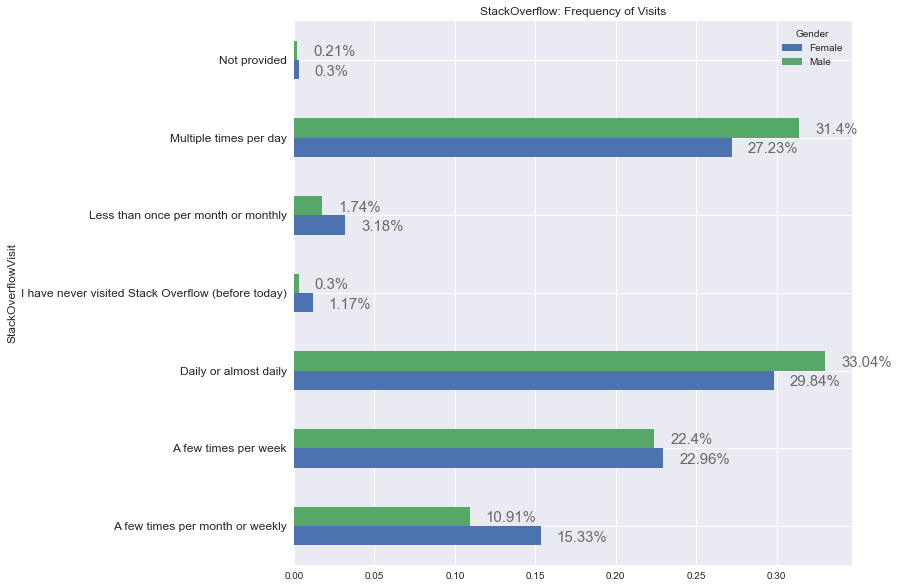

In [39]:
## Frequency of visits to StackOverflow

ax = so_gender.groupby("Gender")['StackOverflowVisit'].value_counts(normalize=True).unstack(0).plot(kind='barh',figsize=(10,10), title="StackOverflow: Frequency of Visits")

fig = ax.get_figure()

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar labels using above list
total = sum(totals)

# set individual bar labels using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_width()+.01, i.get_y()+0.05, \
            str(round((i.get_width()*100), 2))+'%', fontsize=15,
                color='dimgrey')
    
name = "SO_visit-frequency_barplot.jpg"
save_location = save_images + "\\" + name
fig.savefig(save_location)

#### 1.4.4. SO: Has StackOverflow Account

In [40]:
print("Women  \n \n", so_female["StackOverflowHasAccount"].value_counts(normalize=True)*100, sep="")

Women  
 
Yes                               76.84%
No                                15.25%
I'm not sure / I can't remember    6.66%
Not provided                       1.24%
Name: StackOverflowHasAccount, dtype: float64


In [41]:
print("Men \n \n", so_male["StackOverflowHasAccount"].value_counts(normalize=True)*100, sep="")

Men 
 
Yes                               88.74%
No                                 7.62%
I'm not sure / I can't remember    3.28%
Not provided                       0.36%
Name: StackOverflowHasAccount, dtype: float64


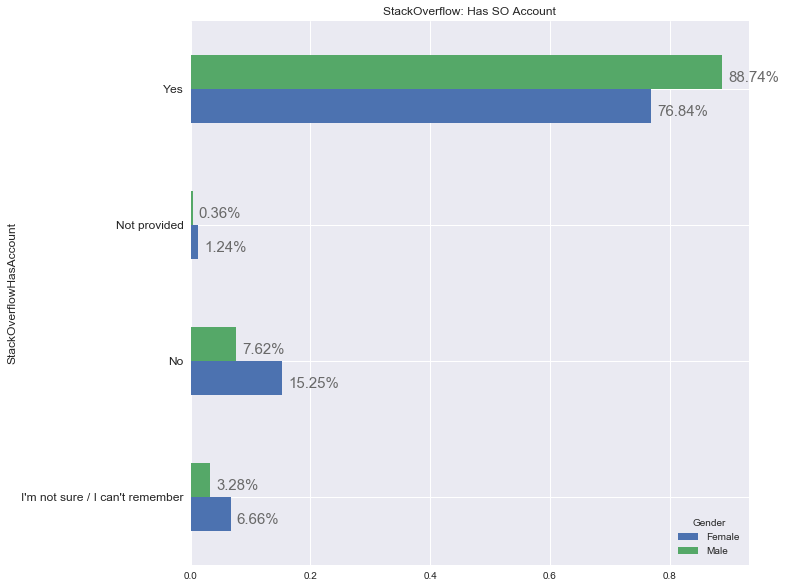

In [42]:
## Frequency of visits to StackOverflow

ax = so_gender.groupby("Gender")['StackOverflowHasAccount'].value_counts(normalize=True).unstack(0).plot(kind='barh',figsize=(10,10), title="StackOverflow: Has SO Account")

fig = ax.get_figure()

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar labels using above list
total = sum(totals)

# set individual bar labels using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_width()+.01, i.get_y()+0.05, \
            str(round((i.get_width()*100), 2))+'%', fontsize=15,
                color='dimgrey')
    
name = "SO_has-account_barplot.jpg"
save_location = save_images + "\\" + name
fig.savefig(save_location)

##### Women on SO are less likely to have an account (77%, 89%) than men

#### 1.4.5. SO: StackOverflow Participation

In [43]:
print("Women  \n \n", so_female["StackOverflowParticipate"].value_counts(normalize=True)*100, sep="")

Women  
 
Less than once per month or monthly                  32.72%
Not provided                                         23.65%
I have never participated in Q&A on Stack Overflow   19.83%
A few times per month or weekly                      13.69%
A few times per week                                  5.69%
Daily or almost daily                                 2.91%
Multiple times per day                                1.52%
Name: StackOverflowParticipate, dtype: float64


In [44]:
print("Men \n \n", so_male["StackOverflowParticipate"].value_counts(normalize=True)*100, sep="")

Men 
 
Less than once per month or monthly                  34.95%
A few times per month or weekly                      20.54%
I have never participated in Q&A on Stack Overflow   14.06%
Not provided                                         11.51%
A few times per week                                 10.57%
Daily or almost daily                                 5.42%
Multiple times per day                                2.94%
Name: StackOverflowParticipate, dtype: float64


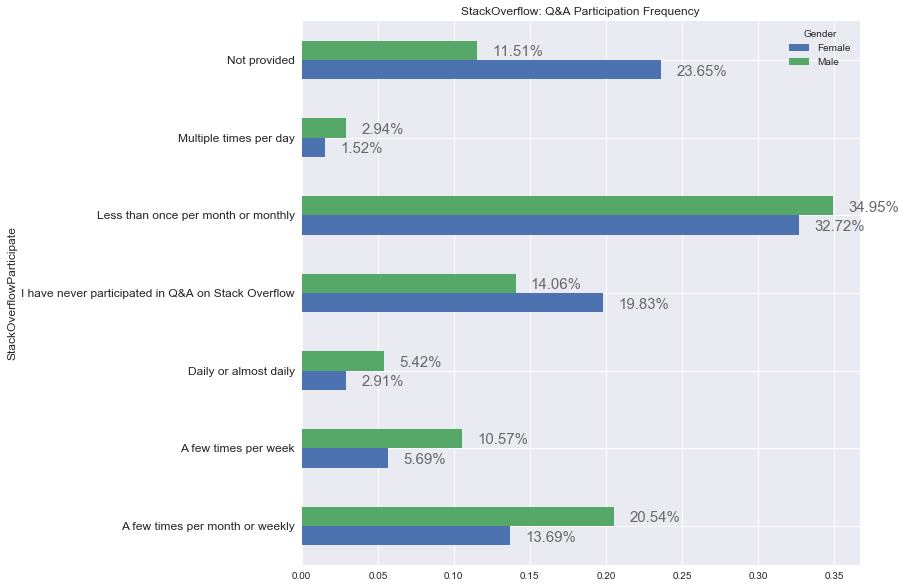

In [45]:
## Frequency of visits to StackOverflow

ax = so_gender.groupby("Gender")['StackOverflowParticipate'].value_counts(normalize=True).unstack(0).plot(kind='barh',figsize=(10,10), title="StackOverflow: Q&A Participation Frequency")

fig = ax.get_figure()

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar labels using above list
total = sum(totals)

# set individual bar labels using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_width()+.01, i.get_y()+0.05, \
            str(round((i.get_width()*100), 2))+'%', fontsize=15,
                color='dimgrey')
    
name = "SO_participate_barplot.jpg"
save_location = save_images + "\\" + name
fig.savefig(save_location)

##### Women report less participation than men at every frequency level, and are more likely to report having never participated in Q&A (20%, 14%).


#### 1.5. GitHub Participation

#### 1.5.1 GH: Types of Participation

In [46]:
participation_type_prop = gh_female[participation_type_vars].mean() * 100
participation_type_prop = participation_type_prop.sort_values()
pd.DataFrame(participation_type_prop, columns=["percent"])

,percent
PARTICIPATION.TYPE.OTHER,9.60%
PARTICIPATION.TYPE.CONTRIBUTE,59.20%
PARTICIPATION.TYPE.FOLLOW,64.00%
PARTICIPATION.TYPE.USE.DEPENDENCIES,84.00%
PARTICIPATION.TYPE.USE.APPLICATIONS,94.40%


In [47]:
participation_type_prop = gh_male[participation_type_vars].mean() * 100
participation_type_prop = participation_type_prop.sort_values()
pd.DataFrame(participation_type_prop, columns=["percent"])

,percent
PARTICIPATION.TYPE.OTHER,5.76%
PARTICIPATION.TYPE.CONTRIBUTE,74.31%
PARTICIPATION.TYPE.FOLLOW,83.14%
PARTICIPATION.TYPE.USE.DEPENDENCIES,87.16%
PARTICIPATION.TYPE.USE.APPLICATIONS,95.01%


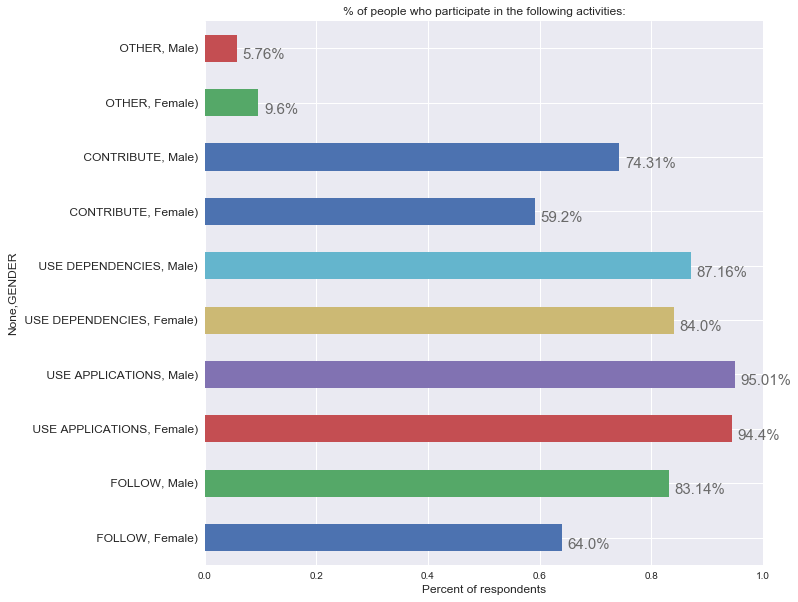

In [48]:

ax = gh_gender.groupby("GENDER")[participation_type_vars].mean().unstack(0).plot(kind='barh',figsize=(10,10), title="StackOverflow: Q&A Participation Frequency")
                                                                       
fig = ax.get_figure()


# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar labels using above list
total = sum(totals)

# set individual bar labels using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_width()+.01, i.get_y()+0.05, \
            str(round((i.get_width()*100), 2))+'%', fontsize=15,
                color='dimgrey')
    
labels = []
for l in ax.get_yticklabels():
    title_text = l.get_text()[19:].replace(".", " ") # cut off "CONTRIBUTOR.TYPE"
        
    labels.append(title_text)
    
plt.xlim(0,1)
ax.set_yticklabels(labels)

ax.set_xlabel("Percent of respondents")
t = plt.title("% of people who participate in the following activities:")


##### Women are less likely than men to participate by contributing code (59%, 74%) and following a repository (64%, 83%), despite other participation types being roughly equivalent.


#### 1.5.2 GH: Types of Contribution

In [49]:
f_contrib_type_responses = gh_female[contrib_type_vars].apply(pd.Series.value_counts).transpose()

#contrib_type_responses.columns = ["Not at all important", "Slightly important","Don't know", "Somewhat important", "Very important"]
f_contrib_type_responses = f_contrib_type_responses[["Never", "Rarely", "Occasionally", "Frequently"]]
f_contrib_type_responses = f_contrib_type_responses[["Frequently", "Occasionally", "Rarely", "Never"]]
f_contrib_type_responses = f_contrib_type_responses.sort_values(by='Frequently')
f_contrib_type_responses

,Frequently,Occasionally,Rarely,Never
CONTRIBUTOR.TYPE.FEATURE.REQUESTS,14,32,16,11
CONTRIBUTOR.TYPE.COMMUNITY.ADMIN,14,10,17,31
CONTRIBUTOR.TYPE.CONTRIBUTE.DOCS,16,20,26,12
CONTRIBUTOR.TYPE.PROJECT.MAINTENANCE,22,19,13,19
CONTRIBUTOR.TYPE.CONTRIBUTE.CODE,24,19,23,8
CONTRIBUTOR.TYPE.FILE.BUGS,25,31,12,6


In [50]:
m_contrib_type_responses = gh_male[contrib_type_vars].apply(pd.Series.value_counts).transpose()

#contrib_type_responses.columns = ["Not at all important", "Slightly important","Don't know", "Somewhat important", "Very important"]
m_contrib_type_responses = m_contrib_type_responses[["Never", "Rarely", "Occasionally", "Frequently"]]
m_contrib_type_responses = m_contrib_type_responses[["Frequently", "Occasionally", "Rarely", "Never"]]
m_contrib_type_responses = m_contrib_type_responses.sort_values(by='Frequently')
m_contrib_type_responses

,Frequently,Occasionally,Rarely,Never
CONTRIBUTOR.TYPE.COMMUNITY.ADMIN,180,259,531,1516
CONTRIBUTOR.TYPE.CONTRIBUTE.DOCS,309,769,1031,386
CONTRIBUTOR.TYPE.FEATURE.REQUESTS,356,1020,852,261
CONTRIBUTOR.TYPE.PROJECT.MAINTENANCE,672,563,602,661
CONTRIBUTOR.TYPE.FILE.BUGS,683,1300,462,58
CONTRIBUTOR.TYPE.CONTRIBUTE.CODE,763,830,804,112


##### Women are more likely to contribute via filing bugs, while men are more likely to contribute code.


#### 1.5.3 GH: Interest in contributing to OS in the future

In [51]:
print("Women  \n \n", gh_female["FUTURE.CONTRIBUTION.INTEREST"].value_counts(normalize=True)*100, sep="")

Women  
 
Very interested       68.80%
Somewhat interested   26.40%
Not too interested     4.80%
Name: FUTURE.CONTRIBUTION.INTEREST, dtype: float64


In [52]:
print("Men \n \n", gh_male["FUTURE.CONTRIBUTION.INTEREST"].value_counts(normalize=True)*100, sep="")

Men 
 
Very interested         73.63%
Somewhat interested     24.03%
Not too interested       1.92%
Not at all interested    0.27%
Not provided             0.15%
Name: FUTURE.CONTRIBUTION.INTEREST, dtype: float64


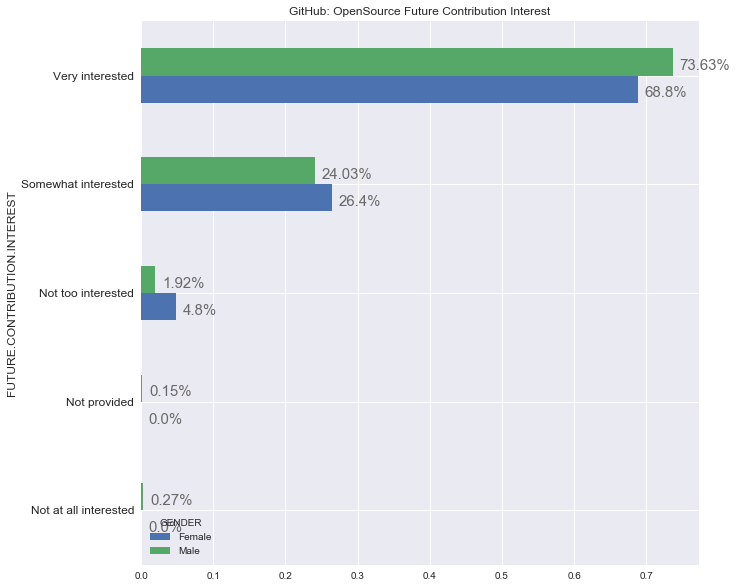

In [53]:
## Interest in Contributing to OS on GitHub

ax = gh_gender.groupby("GENDER")['FUTURE.CONTRIBUTION.INTEREST'].value_counts(normalize=True).unstack(0).plot(kind='barh',figsize=(10,10), title="GitHub: OpenSource Future Contribution Interest")

fig = ax.get_figure()

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar labels using above list
total = sum(totals)

# set individual bar labels using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_width()+.01, i.get_y()+0.05, \
            str(round((i.get_width()*100), 2))+'%', fontsize=15,
                color='dimgrey')
    
name = "GH_OS-interest_barplot.jpg"
save_location = save_images + "\\" + name
fig.savefig(save_location)

##### Pretty comparable, with men being slightly more likely to report being "Very interested" (73%, 69%).

#### 1.5.4 GH: Likelihood to contribute to OS in the future

In [54]:
print("Women  \n \n", gh_female["FUTURE.CONTRIBUTION.LIKELIHOOD"].value_counts(normalize=True)*100, sep="")

Women  
 
Very likely         47.20%
Somewhat likely     41.60%
Somewhat unlikely    8.80%
Very unlikely        2.40%
Name: FUTURE.CONTRIBUTION.LIKELIHOOD, dtype: float64


In [55]:
print("Men \n \n", gh_male["FUTURE.CONTRIBUTION.LIKELIHOOD"].value_counts(normalize=True)*100, sep="")

Men 
 
Very likely         60.85%
Somewhat likely     29.85%
Somewhat unlikely    8.15%
Very unlikely        1.12%
Not provided         0.03%
Name: FUTURE.CONTRIBUTION.LIKELIHOOD, dtype: float64


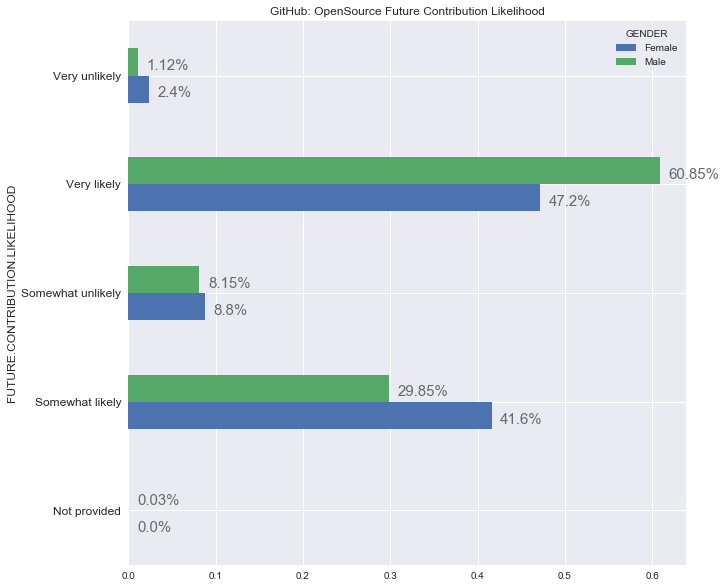

In [56]:
## Likelihood to contribute to OS in the future

ax = gh_gender.groupby("GENDER")['FUTURE.CONTRIBUTION.LIKELIHOOD'].value_counts(normalize=True).unstack(0).plot(kind='barh',figsize=(10,10), title="GitHub: OpenSource Future Contribution Likelihood")

fig = ax.get_figure()

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar labels using above list
total = sum(totals)

# set individual bar labels using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_width()+.01, i.get_y()+0.05, \
            str(round((i.get_width()*100), 2))+'%', fontsize=15,
                color='dimgrey')
    
name = "GH_OS-likelihood_barplot.jpg"
save_location = save_images + "\\" + name
fig.savefig(save_location)

##### Women are significantly less liklely to report being "Very likely" to contribute to OS in the future (47%, 61%), and more likely to report only being "Somewhat likely" to contribute (42%, 30%).

#### 1.6. HackerRank Usage

In [57]:
print("Women  \n \n", hr_female["q33HackerRankChallforJob"].value_counts(normalize=True)*100, sep="")

Women  
 
No             58.08%
Yes            40.81%
Not provided    1.12%
Name: q33HackerRankChallforJob, dtype: float64


In [58]:
print("Men \n \n",hr_male["q33HackerRankChallforJob"].value_counts(normalize=True)*100, sep="")

Men 
 
No             59.69%
Yes            39.64%
Not provided    0.67%
Name: q33HackerRankChallforJob, dtype: float64


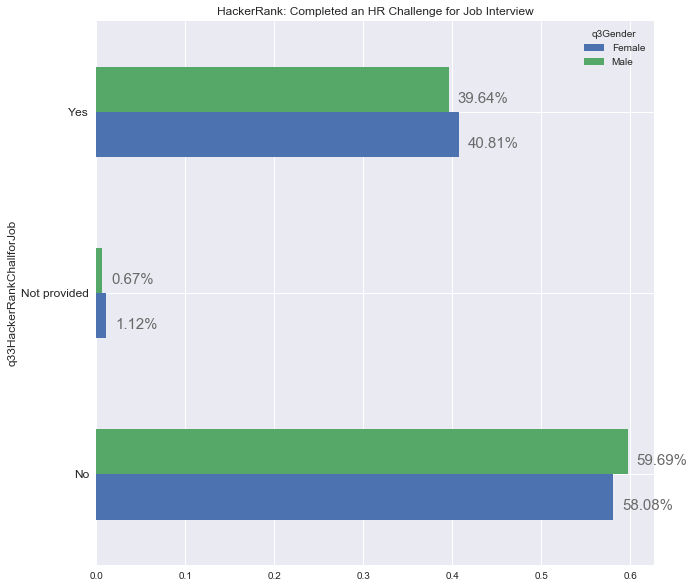

In [59]:
## Used HackerRank for Job Interviews

ax = hr_gender.groupby("q3Gender")['q33HackerRankChallforJob'].value_counts(normalize=True).unstack(0).plot(kind='barh',figsize=(10,10), title="HackerRank: Completed an HR Challenge for Job Interview")

fig = ax.get_figure()

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar labels using above list
total = sum(totals)

# set individual bar labels using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_width()+.01, i.get_y()+0.05, \
            str(round((i.get_width()*100), 2))+'%', fontsize=15,
                color='dimgrey')
    
name = "HR_used-for-interview_barplot.jpg"
save_location = save_images + "\\" + name
fig.savefig(save_location)

##### Almost identical usage of HackerRank challenges for job interviews

## RQ2: To what extent are “online coding communities” welcome environments for women?

### RQ2a: How do women’s perception of their belongingness on those communities differ from men’s?

In [60]:
# Agree/Disagree1 (“I think of myself as competing with my peers”)
# 		A/D2 (“I’m not as good at programming as my peers”)
# 		A/D3 (“I feel a sense of kinship to other developers”)
# Recommend SO to a friend		
# 		StackOverflowConsiderMember
_

,Frequently,Occasionally,Rarely,Never
CONTRIBUTOR.TYPE.COMMUNITY.ADMIN,180,259,531,1516
CONTRIBUTOR.TYPE.CONTRIBUTE.DOCS,309,769,1031,386
CONTRIBUTOR.TYPE.FEATURE.REQUESTS,356,1020,852,261
CONTRIBUTOR.TYPE.PROJECT.MAINTENANCE,672,563,602,661
CONTRIBUTOR.TYPE.FILE.BUGS,683,1300,462,58
CONTRIBUTOR.TYPE.CONTRIBUTE.CODE,763,830,804,112


### 2.1. StackOverflow

#### 2.1.1. SO: "I think of myself as competing with my peers"

In [61]:
print("Women  \n \n", so_female["AgreeDisagree2"].value_counts(normalize=True)*100, sep="")

Women  
 
Disagree                     27.68%
Agree                        25.64%
Neither Agree nor Disagree   24.82%
Strongly disagree            13.57%
Strongly agree                6.71%
Not provided                  1.59%
Name: AgreeDisagree2, dtype: float64


In [62]:
print("Men \n \n", so_male["AgreeDisagree2"].value_counts(normalize=True)*100, sep="")

Men 
 
Agree                        26.99%
Neither Agree nor Disagree   25.96%
Disagree                     25.55%
Strongly disagree            12.60%
Strongly agree                7.63%
Not provided                  1.27%
Name: AgreeDisagree2, dtype: float64


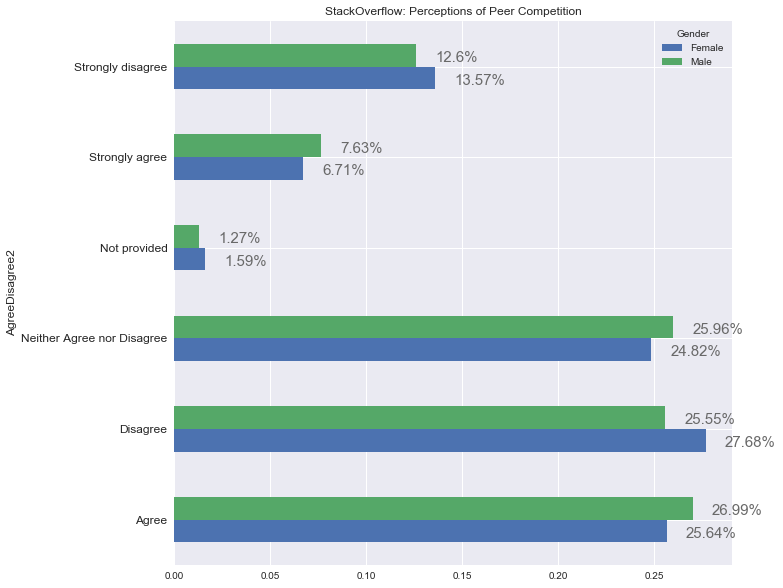

In [63]:
## Perceptions of Competition on StackOverflow

ax = so_gender.groupby("Gender")['AgreeDisagree2'].value_counts(normalize=True).unstack(0).plot(kind='barh',figsize=(10,10), title="StackOverflow: Perceptions of Peer Competition")

fig = ax.get_figure()

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar labels using above list
total = sum(totals)

# set individual bar labels using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_width()+.01, i.get_y()+0.05, \
            str(round((i.get_width()*100), 2))+'%', fontsize=15,
                color='dimgrey')
    
name = "SO_competition-perception_barplot.jpg"
save_location = save_images + "\\" + name
fig.savefig(save_location)

#### 2.1.2. SO: "I feel a sense of kinship or connection to other developers"

In [64]:
print("Women  \n \n", so_female["AgreeDisagree1"].value_counts(normalize=True)*100, sep="")

Women  
 
Agree                        51.78%
Neither Agree nor Disagree   21.22%
Strongly agree               16.05%
Disagree                      6.83%
Strongly disagree             2.43%
Not provided                  1.69%
Name: AgreeDisagree1, dtype: float64


In [65]:
print("Men \n \n", so_male["AgreeDisagree1"].value_counts(normalize=True)*100, sep="")

Men 
 
Agree                        53.88%
Neither Agree nor Disagree   20.78%
Strongly agree               16.52%
Disagree                      5.48%
Strongly disagree             1.91%
Not provided                  1.44%
Name: AgreeDisagree1, dtype: float64


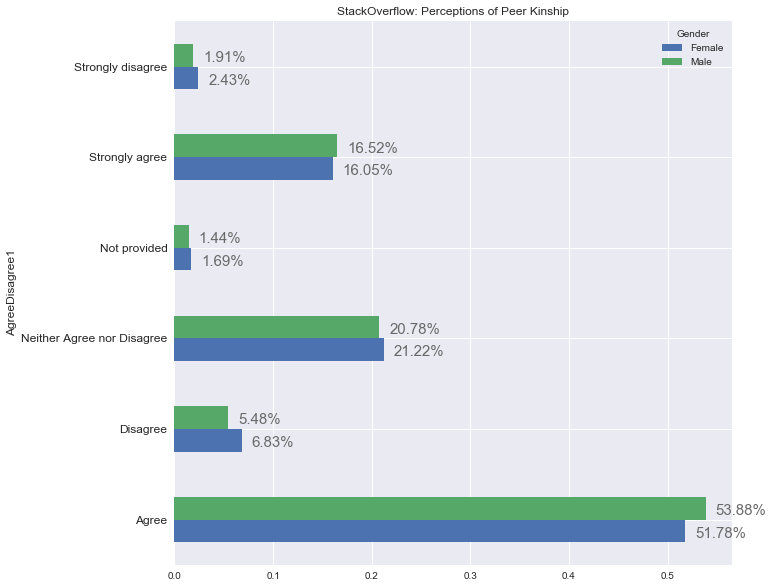

In [66]:
## Perceptions of Kinship on StackOverflow

ax = so_gender.groupby("Gender")['AgreeDisagree1'].value_counts(normalize=True).unstack(0).plot(kind='barh',figsize=(10,10), title="StackOverflow: Perceptions of Peer Kinship")

fig = ax.get_figure()

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar labels using above list
total = sum(totals)

# set individual bar labels using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_width()+.01, i.get_y()+0.05, \
            str(round((i.get_width()*100), 2))+'%', fontsize=15,
                color='dimgrey')
    
name = "SO_kinship-perception_barplot.jpg"
save_location = save_images + "\\" + name
fig.savefig(save_location)

#### 2.1.3. SO: "I'm not as good at programming as most of my peers"

In [67]:
print("Women  \n \n", so_female["AgreeDisagree3"].value_counts(normalize=True)*100, sep="")

Women  
 
Disagree                     29.14%
Neither Agree nor Disagree   26.26%
Agree                        22.16%
Strongly disagree            13.52%
Strongly agree                7.43%
Not provided                  1.49%
Name: AgreeDisagree3, dtype: float64


In [68]:
print("Men \n \n", so_male["AgreeDisagree3"].value_counts(normalize=True)*100, sep="")

Men 
 
Disagree                     34.43%
Neither Agree nor Disagree   24.39%
Strongly disagree            22.87%
Agree                        13.57%
Strongly agree                3.49%
Not provided                  1.25%
Name: AgreeDisagree3, dtype: float64


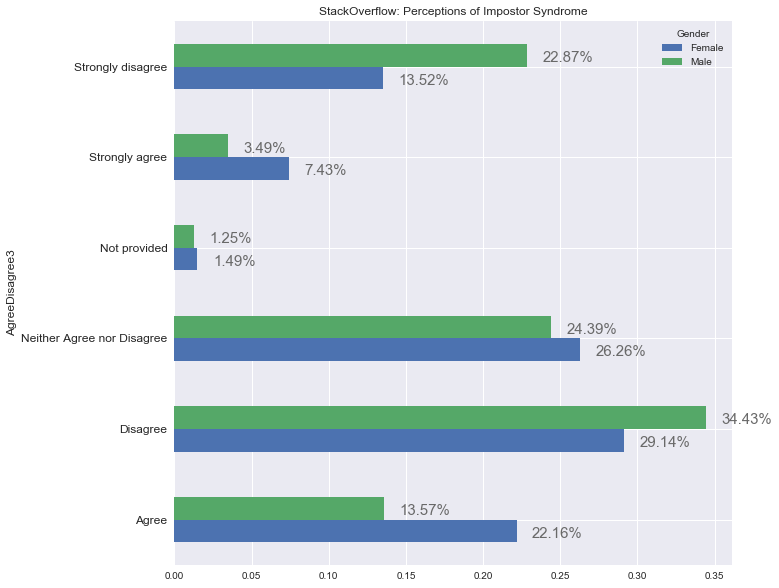

In [69]:
## Impostor Syndrome

ax = so_gender.groupby("Gender")['AgreeDisagree3'].value_counts(normalize=True).unstack(0).plot(kind='barh',figsize=(10,10), title="StackOverflow: Perceptions of Impostor Syndrome")

fig = ax.get_figure()

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar labels using above list
total = sum(totals)

# set individual bar labels using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_width()+.01, i.get_y()+0.05, \
            str(round((i.get_width()*100), 2))+'%', fontsize=15,
                color='dimgrey')
    
name = "SO_impostor-perception_barplot.jpg"
save_location = save_images + "\\" + name
fig.savefig(save_location)

##### Women are much more likely to strongly agree (7%) and agree (22%) with the statement as men are (3%, 14%).

#### 2.1.4. SO: Likelihood to Recommend StackOverflow

In [70]:
print("Women  \n \n", so_female["StackOverflowRecommend"].value_counts(normalize=True)*100, sep="")

Women  
 
10 (Very Likely)   66.81%
8                   9.86%
9                   9.14%
7                   6.21%
5                   2.66%
6                   2.51%
Not provided        0.82%
3                   0.65%
4                   0.50%
0 (Not Likely)      0.32%
2                   0.27%
1                   0.25%
Name: StackOverflowRecommend, dtype: float64


In [71]:
print("Men \n \n", so_male["StackOverflowRecommend"].value_counts(normalize=True)*100, sep="")

Men 
 
10 (Very Likely)   70.04%
9                  11.01%
8                   9.71%
7                   4.62%
6                   1.55%
5                   1.21%
Not provided        0.63%
4                   0.34%
3                   0.31%
0 (Not Likely)      0.27%
2                   0.21%
1                   0.10%
Name: StackOverflowRecommend, dtype: float64


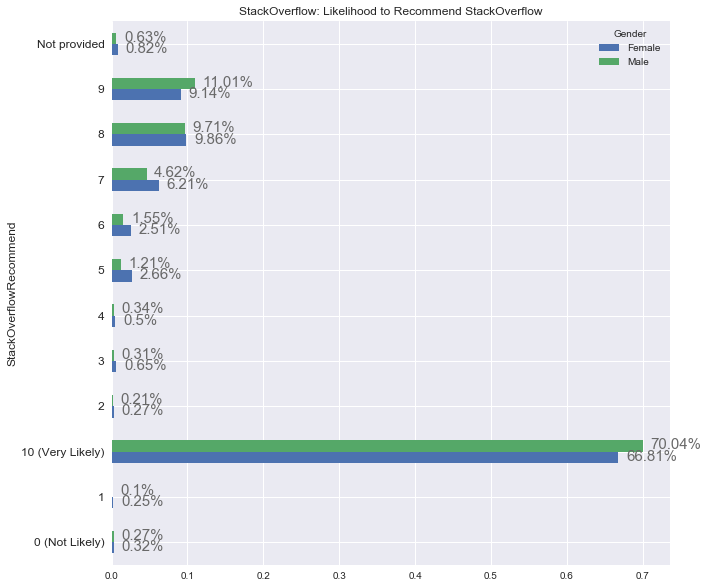

In [72]:
## Likelihood to Recommend StackOverflow

ax = so_gender.groupby("Gender")['StackOverflowRecommend'].value_counts(normalize=True).unstack(0).plot(kind='barh',figsize=(10,10), title="StackOverflow: Likelihood to Recommend StackOverflow")

fig = ax.get_figure()

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar labels using above list
total = sum(totals)

# set individual bar labels using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_width()+.01, i.get_y()+0.05, \
            str(round((i.get_width()*100), 2))+'%', fontsize=15,
                color='dimgrey')
    
name = "SO_recommend_barplot.jpg"
save_location = save_images + "\\" + name
fig.savefig(save_location)

##### Men slightly more likely to report being "Very likely" to recommend StackOverflow than women (70%, 67%).

#### 2.1.5. SO: "Do you consider yourself a member of the Stack Overflow community?"

In [73]:
print("Women  \n \n", so_female["StackOverflowConsiderMember"].value_counts(normalize=True)*100, sep="")

Women  
 
Yes            43.13%
No             29.61%
I'm not sure   27.08%
Not provided    0.17%
Name: StackOverflowConsiderMember, dtype: float64


In [74]:
print("Men \n \n", so_male["StackOverflowConsiderMember"].value_counts(normalize=True)*100, sep="")

Men 
 
Yes            56.81%
No             21.75%
I'm not sure   21.29%
Not provided    0.14%
Name: StackOverflowConsiderMember, dtype: float64


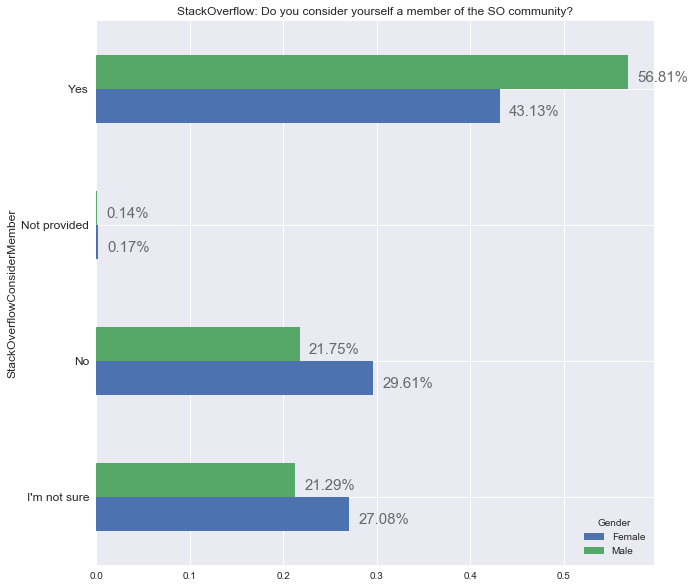

In [75]:
## Consider yourself a member of the StackOverflow Community

ax = so_gender.groupby("Gender")['StackOverflowConsiderMember'].value_counts(normalize=True).unstack(0).plot(kind='barh',figsize=(10,10), title="StackOverflow: Do you consider yourself a member of the SO community?")

fig = ax.get_figure()

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar labels using above list
total = sum(totals)

# set individual bar labels using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_width()+.01, i.get_y()+0.05, \
            str(round((i.get_width()*100), 2))+'%', fontsize=15,
                color='dimgrey')
    
name = "SO_community-member_barplot.jpg"
save_location = save_images + "\\" + name
fig.savefig(save_location)

##### Men significantly more likely to consider themselves a member of StackOverflow than women (57%, 43%).

### 2.2. GitHub

#### 2.2.1. GH: "The community values contributions from people like me."

In [76]:
print("Women  \n \n", gh_female["EXTERNAL.EFFICACY"].value_counts(normalize=True)*100, sep="")

Women  
 
Somewhat agree               29.60%
Neither agree nor disagree   28.80%
Strongly agree               26.40%
Somewhat disagree            11.20%
Strongly disagree             4.00%
Name: EXTERNAL.EFFICACY, dtype: float64


In [77]:
print("Men \n \n", gh_male["EXTERNAL.EFFICACY"].value_counts(normalize=True)*100, sep="")

Men 
 
Somewhat agree               36.34%
Strongly agree               34.69%
Neither agree nor disagree   24.71%
Somewhat disagree             2.95%
Strongly disagree             1.09%
Not provided                  0.21%
Name: EXTERNAL.EFFICACY, dtype: float64


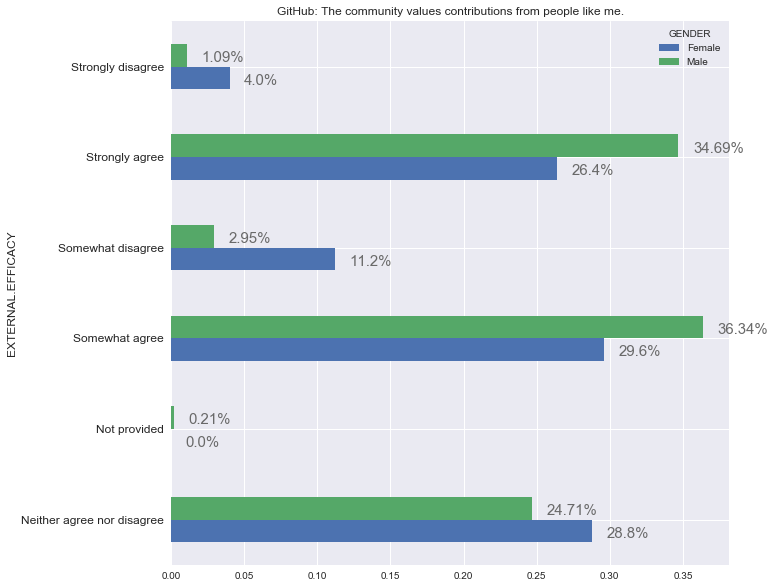

In [78]:
## GH: Community Values Me

ax = gh_gender.groupby("GENDER")['EXTERNAL.EFFICACY'].value_counts(normalize=True).unstack(0).plot(kind='barh',figsize=(10,10), title="GitHub: The community values contributions from people like me.")

fig = ax.get_figure()

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar labels using above list
total = sum(totals)

# set individual bar labels using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_width()+.01, i.get_y()+0.05, \
            str(round((i.get_width()*100), 2))+'%', fontsize=15,
                color='dimgrey')
    
name = "GH_community-values-me_barplot.jpg"
save_location = save_images + "\\" + name
fig.savefig(save_location)

##### Men significantly more likely to Strongly Agree (35%, 26%) and Somewhat Agree (36%, 30%) that the GitHub community values "people like them" than women.

#### 2.2.2. GH: " I have the skills and understanding necessary to make meaningful contributions to open source projects."

In [79]:
print("Women  \n \n", gh_female["INTERNAL.EFFICACY"].value_counts(normalize=True)*100, sep="")

Women  
 
Somewhat agree               41.60%
Strongly agree               35.20%
Neither agree nor disagree   12.00%
Somewhat disagree             8.00%
Strongly disagree             3.20%
Name: INTERNAL.EFFICACY, dtype: float64


In [80]:
print("Men \n \n", gh_male["INTERNAL.EFFICACY"].value_counts(normalize=True)*100, sep="")

Men 
 
Strongly agree               46.68%
Somewhat agree               37.53%
Neither agree nor disagree    8.98%
Somewhat disagree             5.49%
Strongly disagree             1.27%
Not provided                  0.06%
Name: INTERNAL.EFFICACY, dtype: float64


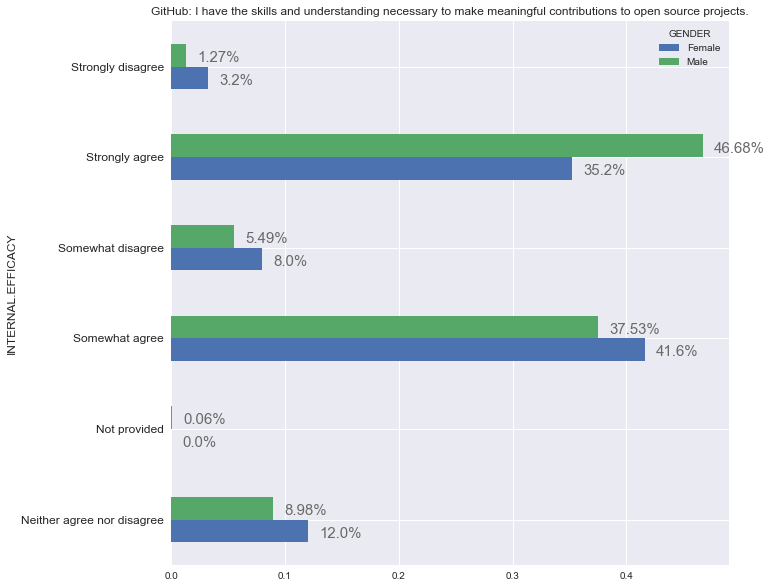

In [81]:
## GH: I have the skills to contribute meaningfully to OS

ax = gh_gender.groupby("GENDER")['INTERNAL.EFFICACY'].value_counts(normalize=True).unstack(0).plot(kind='barh',figsize=(10,10), title="GitHub: I have the skills and understanding necessary to make meaningful contributions to open source projects.")

fig = ax.get_figure()

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar labels using above list
total = sum(totals)

# set individual bar labels using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_width()+.01, i.get_y()+0.05, \
            str(round((i.get_width()*100), 2))+'%', fontsize=15,
                color='dimgrey')
    
name = "GH_have-necessary-skills_barplot.jpg"
save_location = save_images + "\\" + name
fig.savefig(save_location)

##### Men significantly more likely to Strongly Agree (47%, 35%) and Somewhat Agree (42%, 38%) that they "have the necessary skills to contribute meaningfully to OS" than women.

#### 2.2.3. GH: " I have the skills and understanding necessary to make meaningful contributions to open source projects."

In [82]:
print("Women  \n \n", gh_female["OSS.IDENTIFICATION"].value_counts(normalize=True)*100, sep="")

Women  
 
Somewhat agree               37.60%
Strongly agree               25.60%
Neither agree nor disagree   16.80%
Somewhat disagree            13.60%
Strongly disagree             6.40%
Name: OSS.IDENTIFICATION, dtype: float64


In [83]:
print("Men \n \n", gh_male["OSS.IDENTIFICATION"].value_counts(normalize=True)*100, sep="")

Men 
 
Strongly agree               36.76%
Somewhat agree               34.34%
Neither agree nor disagree   18.75%
Somewhat disagree             7.17%
Strongly disagree             2.83%
Not provided                  0.15%
Name: OSS.IDENTIFICATION, dtype: float64


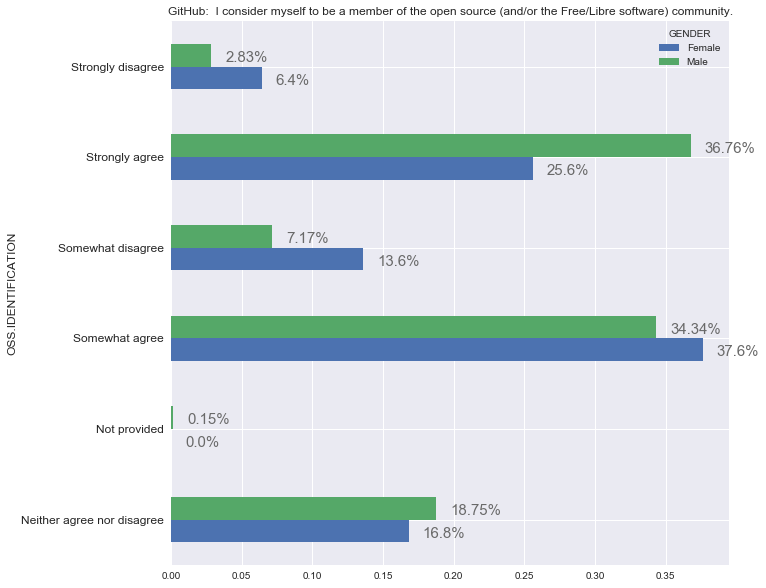

In [84]:
## GH: Consider myself a member of the OS community

ax = gh_gender.groupby("GENDER")['OSS.IDENTIFICATION'].value_counts(normalize=True).unstack(0).plot(kind='barh',figsize=(10,10), title="GitHub:  I consider myself to be a member of the open source (and/or the Free/Libre software) community.")

fig = ax.get_figure()

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar labels using above list
total = sum(totals)

# set individual bar labels using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_width()+.01, i.get_y()+0.05, \
            str(round((i.get_width()*100), 2))+'%', fontsize=15,
                color='dimgrey')
    
name = "GH_consider-myself-community-member_barplot.jpg"
save_location = save_images + "\\" + name
fig.savefig(save_location)

##### Men significantly more likely to Strongly Agree (37%, 26%) that they "consider themselves a member of the OS community" than women, and women are more likely to Somewhat Disagree that they consider themselves a member of the OS community (14%, 7%) than men.

### 2.3. HackerRank

#### 2.3.1. HR: Recommend HackerRank to a friend

In [85]:
print("Women  \n \n", hr_female["q32RecommendHackerRank"].value_counts(normalize=True)*100, sep="")

Women  
 
Yes            96.82%
Not provided    1.80%
No              1.38%
Name: q32RecommendHackerRank, dtype: float64


In [86]:
print("Men \n \n",hr_male["q32RecommendHackerRank"].value_counts(normalize=True)*100, sep="")

Men 
 
Yes            95.29%
No              2.73%
Not provided    1.98%
Name: q32RecommendHackerRank, dtype: float64


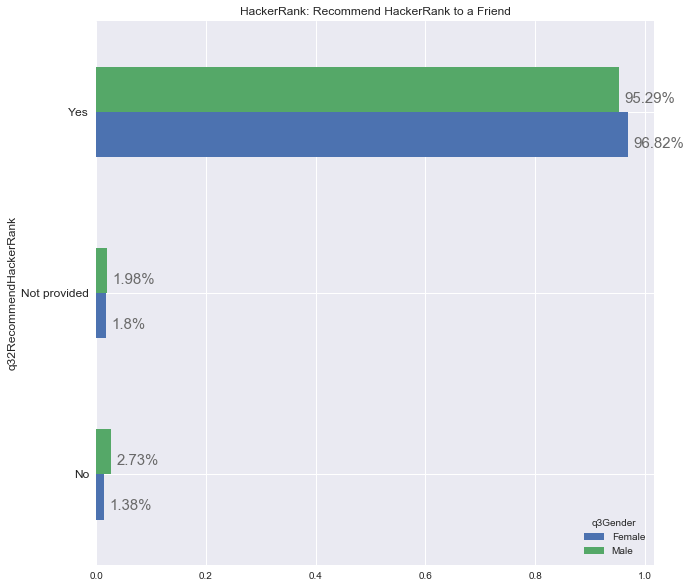

In [87]:
## Recommend HackerRank

ax = hr_gender.groupby("q3Gender")['q32RecommendHackerRank'].value_counts(normalize=True).unstack(0).plot(kind='barh',figsize=(10,10), title="HackerRank: Recommend HackerRank to a Friend")

fig = ax.get_figure()

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar labels using above list
total = sum(totals)

# set individual bar labels using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_width()+.01, i.get_y()+0.05, \
            str(round((i.get_width()*100), 2))+'%', fontsize=15,
                color='dimgrey')
    
name = "HR_recommend_barplot.jpg"
save_location = save_images + "\\" + name
fig.savefig(save_location)

##### Comparable likelihood to recommend HR

#### 2.3.2. HR: How positive was your experience doing a HR challenge?

In [88]:
print("Women  \n \n", hr_female["q34PositiveExp"].value_counts(normalize=True)*100, sep="")

Women  
 
Not provided   64.60%
4.0            12.69%
5.0            12.37%
3.0             7.28%
2.0             1.92%
1.0             0.80%
0.0             0.34%
Name: q34PositiveExp, dtype: float64


In [89]:
print("Men \n \n",hr_male["q34PositiveExp"].value_counts(normalize=True)*100, sep="")

Men 
 
Not provided   63.84%
5.0            14.25%
4.0            13.91%
3.0             5.56%
2.0             1.40%
1.0             0.72%
0.0             0.32%
Name: q34PositiveExp, dtype: float64


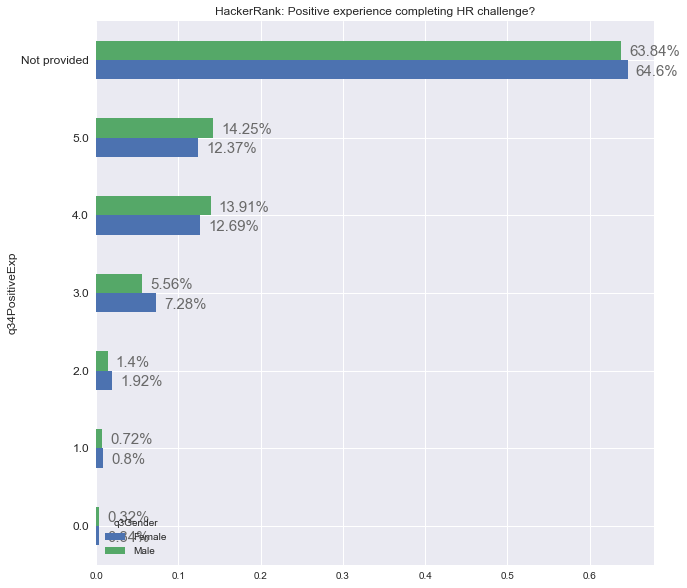

In [90]:
## Recommend HackerRank

ax = hr_gender.groupby("q3Gender")['q34PositiveExp'].value_counts(normalize=True).unstack(0).plot(kind='barh',figsize=(10,10), title="HackerRank: Positive experience completing HR challenge?")

fig = ax.get_figure()

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar labels using above list
total = sum(totals)

# set individual bar labels using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_width()+.01, i.get_y()+0.05, \
            str(round((i.get_width()*100), 2))+'%', fontsize=15,
                color='dimgrey')
    
name = "HR_positive_barplot.jpg"
save_location = save_images + "\\" + name
fig.savefig(save_location)

##### Comparable positive experience with HR

### RQ2b: What are the barriers to women’s participation in online coding communities?

#### 2.4.1 GH: How important is a welcoming community when contributing to OS projects?

In [91]:
print("Women  \n \n", gh_female["OSS.CONTRIBUTOR.PRIORITIES.WELCOMING.COMMUNITY"].value_counts(normalize=True)*100, sep="")

Women  
 
Not provided                     44.00%
Very important to have           40.80%
Somewhat important to have        9.60%
Not important either way          4.80%
Somewhat important not to have    0.80%
Name: OSS.CONTRIBUTOR.PRIORITIES.WELCOMING.COMMUNITY, dtype: float64


In [92]:
print("Men \n \n", gh_male["OSS.CONTRIBUTOR.PRIORITIES.WELCOMING.COMMUNITY"].value_counts(normalize=True)*100, sep="")

Men 
 
Very important to have           34.46%
Not provided                     27.64%
Somewhat important to have       27.49%
Not important either way          9.45%
Somewhat important not to have    0.47%
Very important not to have        0.38%
Don't know what this is           0.12%
Name: OSS.CONTRIBUTOR.PRIORITIES.WELCOMING.COMMUNITY, dtype: float64


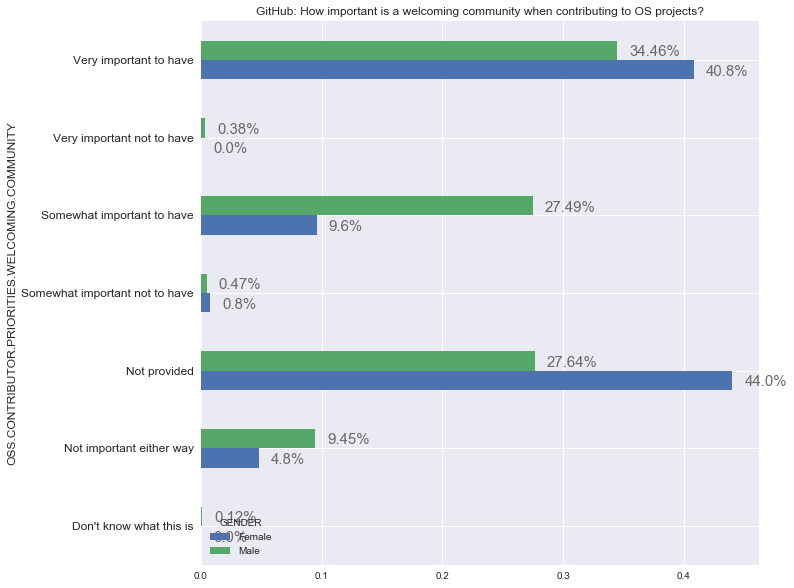

In [93]:
## Importance of welcoming community when contributing to OS projects

ax = gh_gender.groupby("GENDER")['OSS.CONTRIBUTOR.PRIORITIES.WELCOMING.COMMUNITY'].value_counts(normalize=True).unstack(0).plot(kind='barh',figsize=(10,10), title="GitHub: How important is a welcoming community when contributing to OS projects?")

fig = ax.get_figure()

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar labels using above list
total = sum(totals)

# set individual bar labels using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_width()+.01, i.get_y()+0.05, \
            str(round((i.get_width()*100), 2))+'%', fontsize=15,
                color='dimgrey')
    
name = "GH_importance-welcoming-community_barplot.jpg"
save_location = save_images + "\\" + name
fig.savefig(save_location)

##### Women on GitHub are more likely than men to feel that a welcoming community on OS projects is Very important (41%, 34%). Men on GitHub are significantly more likely to feel that a welcoming community on OS projects is Not important (9%, 5%) or Somewhat important (28%, 10%) than women. 

#### 2.4.2 GH: How important is a code of conduct when contributing to OS projects?

In [94]:
print("Women  \n \n", gh_female["OSS.CONTRIBUTOR.PRIORITIES.CODE.OF.CONDUCT"].value_counts(normalize=True)*100, sep="")

Women  
 
Not provided                 44.00%
Very important to have       25.60%
Somewhat important to have   18.40%
Not important either way      9.60%
Very important not to have    2.40%
Name: OSS.CONTRIBUTOR.PRIORITIES.CODE.OF.CONDUCT, dtype: float64


In [95]:
print("Men \n \n", gh_male["OSS.CONTRIBUTOR.PRIORITIES.CODE.OF.CONDUCT"].value_counts(normalize=True)*100, sep="")

Men 
 
Not provided                     27.72%
Somewhat important to have       26.63%
Not important either way         25.39%
Very important to have           13.55%
Somewhat important not to have    2.72%
Don't know what this is           2.36%
Very important not to have        1.62%
Name: OSS.CONTRIBUTOR.PRIORITIES.CODE.OF.CONDUCT, dtype: float64


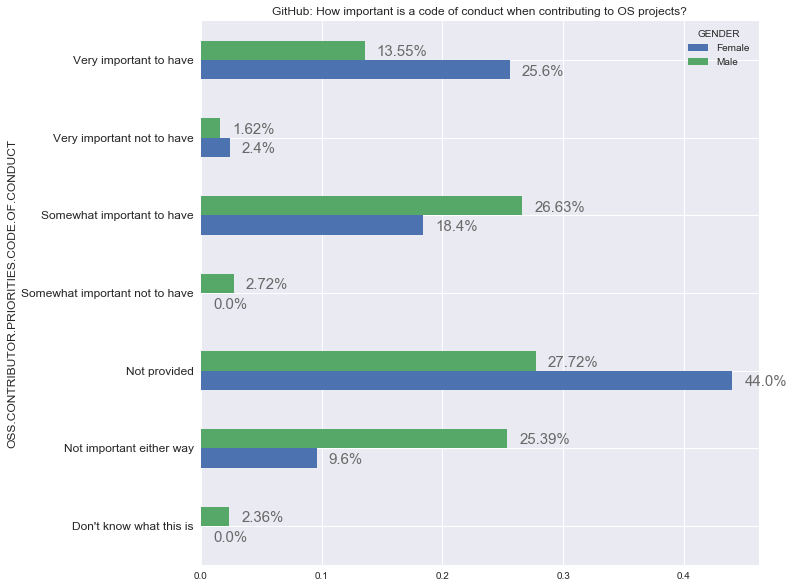

In [96]:
## Importance of code of conduct when contributing to OS projects

ax = gh_gender.groupby("GENDER")['OSS.CONTRIBUTOR.PRIORITIES.CODE.OF.CONDUCT'].value_counts(normalize=True).unstack(0).plot(kind='barh',figsize=(10,10), title="GitHub: How important is a code of conduct when contributing to OS projects?")

fig = ax.get_figure()

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar labels using above list
total = sum(totals)

# set individual bar labels using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_width()+.01, i.get_y()+0.05, \
            str(round((i.get_width()*100), 2))+'%', fontsize=15,
                color='dimgrey')
    
name = "GH_importance-code-of-conduct_barplot.jpg"
save_location = save_images + "\\" + name
fig.savefig(save_location)

##### Women on GitHub are more likely than men to feel that a code of conduct on OS projects is Very important (26%, 14%). Men on GitHub are significantly more likely to feel that a code of conduct on OS projects is Not important (25%, 10%) or Somewhat important (27%, 18%) than women.

#### 2.4.3 GH: How likely are you to use your real name or pseudonym on OS projects?

In [97]:
print("Women  \n \n", gh_female["TRANSPARENCY.PRIVACY.PRACTICES.OSS"].value_counts(normalize=True)*100, sep="")

Women  
 
Not provided                                                                                               40.80%
I include my real name.                                                                                    39.20%
I usually contribute using a consistent pseudonym that is easily linked to my real name online.            14.40%
I usually contribute using a consistent pseudonym that is not linked anywhere with my real name online.     4.80%
I take precautions to use different usernames  in different projects.                                       0.80%
Name: TRANSPARENCY.PRIVACY.PRACTICES.OSS, dtype: float64


In [98]:
print("Men \n \n", gh_male["TRANSPARENCY.PRIVACY.PRACTICES.OSS"].value_counts(normalize=True)*100, sep="")

Men 
 
I include my real name.                                                                                    47.53%
Not provided                                                                                               25.83%
I usually contribute using a consistent pseudonym that is easily linked to my real name online.            19.72%
I usually contribute using a consistent pseudonym that is not linked anywhere with my real name online.     6.23%
I take precautions to use different usernames  in different projects.                                       0.68%
Name: TRANSPARENCY.PRIVACY.PRACTICES.OSS, dtype: float64


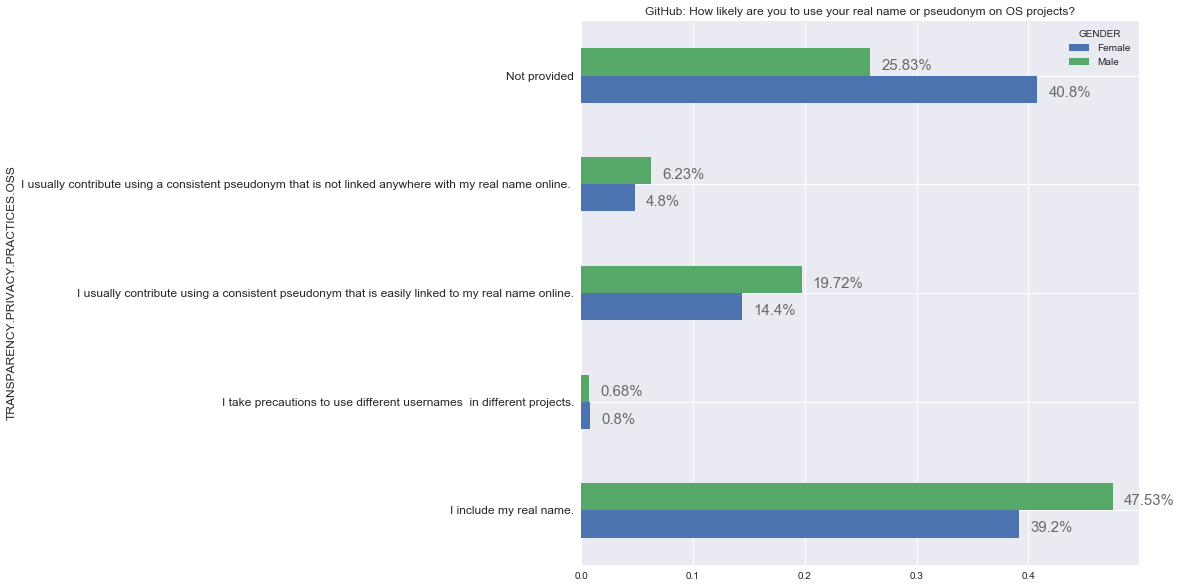

In [99]:
## Use of real name or pseudonym when contributing to OS projects

ax = gh_gender.groupby("GENDER")['TRANSPARENCY.PRIVACY.PRACTICES.OSS'].value_counts(normalize=True).unstack(0).plot(kind='barh',figsize=(10,10), title="GitHub: How likely are you to use your real name or pseudonym on OS projects?")

fig = ax.get_figure()

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar labels using above list
total = sum(totals)

# set individual bar labels using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_width()+.01, i.get_y()+0.05, \
            str(round((i.get_width()*100), 2))+'%', fontsize=15,
                color='dimgrey')
    
name = "GH_pseudonym_barplot.jpg"
save_location = save_images + "\\" + name
fig.savefig(save_location)

##### Women mostly didn't respond to this question (41%), and men are more likely to use all other name options, including pseudonyms.

## RQ3: How do women in online coding communities a) take on leadership roles in their organizations and b) mentor others?

### RQ3a: To what extent do women in online coding communities take on leadership roles in their organizations?

### 3.1. StackOverflow

#### 3.1.1 SO: Developer Type

In [100]:
print(len(so_values["DevType"].value_counts()))

9569


In [101]:
so_gender.loc[(so_gender["DevType"].str.contains("manager")), "DevType"]='Manager'
so_gender.loc[(so_gender["DevType"].str.contains("developer")), "DevType"]='Developer'
so_gender.loc[(so_gender["DevType"].str.contains("executive")), "DevType"]='Executive'
so_gender.loc[(so_gender["DevType"].str.contains("Data scientist or machine learning specialist")) | (so_gender["DevType"].str.contains("Data or business analyst")), "DevType"]='Data Scientist'
so_gender.loc[(so_gender["DevType"].str.contains("Student")), "DevType"]='Student'
so_gender.loc[(so_gender["DevType"].str.contains("Educator")), "DevType"]='Educator'
so_gender.loc[(so_gender["DevType"].str.contains("Designer")), "DevType"]='Designer'
so_gender.loc[(so_gender["DevType"].str.contains("administrator")), "DevType"]='Admin'
so_gender.loc[(so_gender["DevType"].str.contains("Marketing")), "DevType"]='Marketing'


print(so_gender["DevType"].value_counts())

C:\Users\michael.madaio\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Developer            50987
Manager               5988
Student               2018
Data Scientist        1941
Not provided          1127
Admin                  416
Executive              315
Educator               294
DevOps specialist      257
Designer                97
Marketing               43
Name: DevType, dtype: int64


In [102]:
so_gender_dev = so_gender[so_gender["DevType"] != "Student"]
#print(hr_gender_dev["q8JobLevel"])

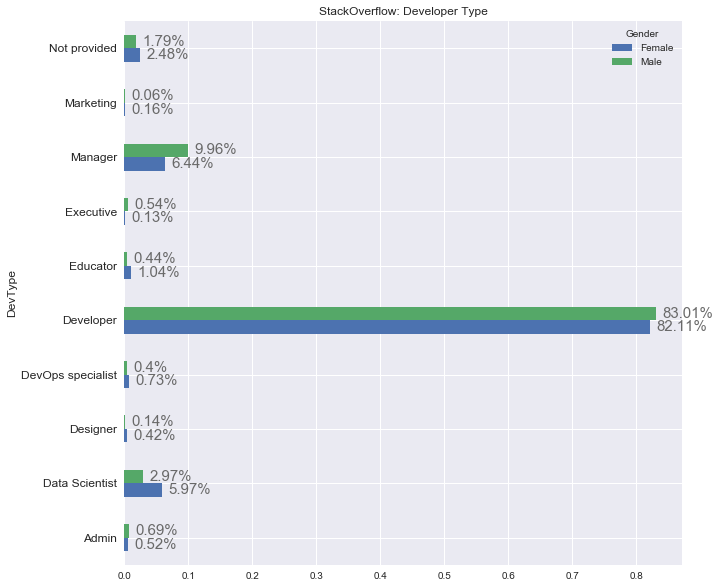

In [103]:
## Developer Type

ax = so_gender_dev.groupby("Gender")['DevType'].value_counts(normalize=True).unstack(0).plot(kind='barh',figsize=(10,10), title="StackOverflow: Developer Type")

fig = ax.get_figure()

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar labels using above list
total = sum(totals)

# set individual bar labels using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_width()+.01, i.get_y()+0.05, \
            str(round((i.get_width()*100), 2))+'%', fontsize=15,
                color='dimgrey')
    
name = "SO_dev-type_barplot.jpg"
save_location = save_images + "\\" + name
fig.savefig(save_location)

##### Men are more likely to be developers (83%, 82%) and managers (10%, 6%), and executives (0.5%, 0.1%). Women are more likely to be data scientists (6%, 3%), DevOps specialists (0.75%, 0.4%), and Educators (1%, 0.4%). 

### 3.2. HackerRank

#### 3.2.1. HR: JobLevel

In [104]:
print("Women  \n \n", hr_female["q8JobLevel"].value_counts(normalize=True)*100, sep="")

Women  
 
Student                        51.94%
Level 1 developer (junior)     20.69%
Senior developer               13.34%
Not provided                    5.00%
New grad                        4.75%
Engineering manager             1.09%
Principal engineer              1.04%
Freelancer                      0.80%
Founder / CEO / CTO             0.61%
Architect                       0.53%
Director / VP of Engineering    0.19%
Name: q8JobLevel, dtype: float64


In [105]:
print("Men \n \n",hr_male["q8JobLevel"].value_counts(normalize=True)*100, sep="")

Men 
 
Student                        39.18%
Senior developer               24.92%
Level 1 developer (junior)     17.54%
Not provided                    3.56%
New grad                        3.41%
Principal engineer              3.00%
Architect                       2.36%
Freelancer                      2.15%
Engineering manager             1.83%
Founder / CEO / CTO             1.43%
Director / VP of Engineering    0.62%
Name: q8JobLevel, dtype: float64


In [106]:
hr_gender_dev = hr_gender[hr_gender["q8JobLevel"] != "Student"]
#print(hr_gender_dev["q8JobLevel"])

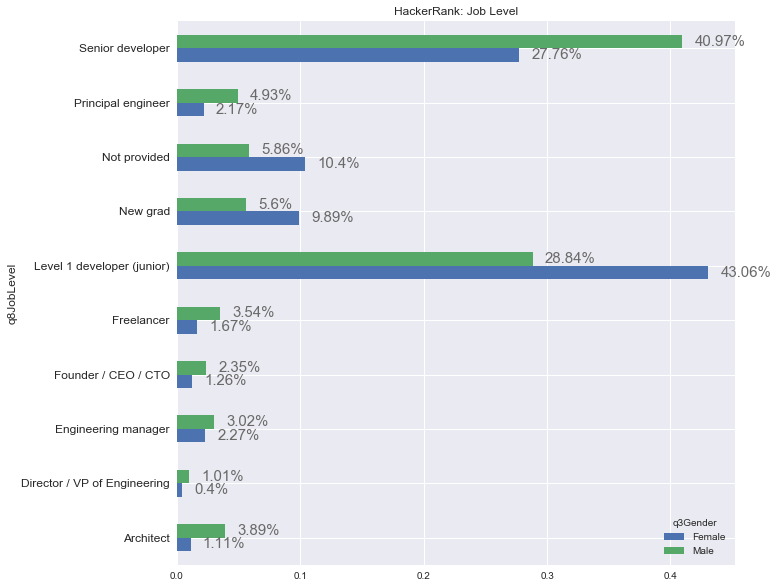

In [107]:
## HackerRank Job Level

ax = hr_gender_dev.groupby("q3Gender")['q8JobLevel'].value_counts(normalize=True).unstack(0).plot(kind='barh',figsize=(10,10), title="HackerRank: Job Level")

fig = ax.get_figure()

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar labels using above list
total = sum(totals)

# set individual bar labels using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_width()+.01, i.get_y()+0.05, \
            str(round((i.get_width()*100), 2))+'%', fontsize=15,
                color='dimgrey')
    
name = "HR_job-level_barplot.jpg"
save_location = save_images + "\\" + name
fig.savefig(save_location)

##### Men are more likely to be senior developers (41%, 28%), principal engineers (5%, 2%), architects (4%, 1%), managers (2%, 1%), directors (1%, 0.4%), and executives (2.4%, 1.3%). Women are more likely to be junior developers (43%, 29%), and new grads (10%, 6%). 

#### 3.2.2. HR: Industry

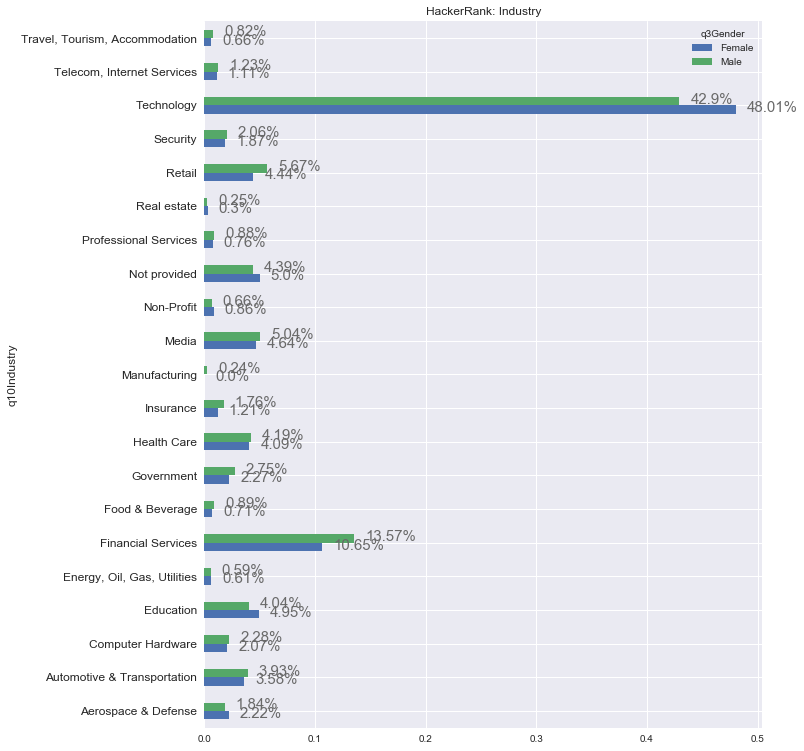

In [108]:
## HackerRank Industry Sector

ax = hr_gender_dev.groupby("q3Gender")['q10Industry'].value_counts(normalize=True).unstack(0).plot(kind='barh',figsize=(10,13), title="HackerRank: Industry")

fig = ax.get_figure()

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar labels using above list
total = sum(totals)

# set individual bar labels using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_width()+.01, i.get_y()+0.05, \
            str(round((i.get_width()*100), 2))+'%', fontsize=15,
                color='dimgrey')
    
name = "HR_industry_barplot.jpg"
save_location = save_images + "\\" + name
fig.savefig(save_location)

#### 3.2.3. HR: Industry (Other) - Word Cloud

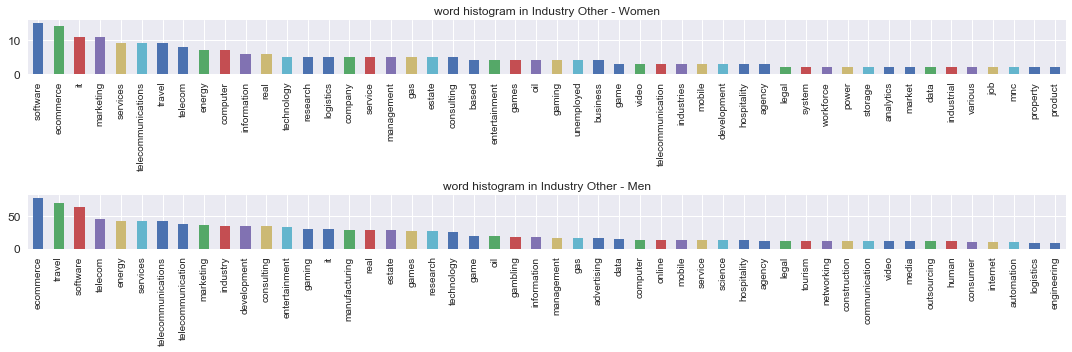

In [113]:
## HackerRank Industry Sector - Other Word Cloud
# Get frequency of each word in Q10 - Industry, "Other

removed_words = set(stopwords.words('english')) | set(string.punctuation)

words_women = [w.lower() for line in hr_gender_dev.loc[hr_gender_dev['q3Gender'] == "Female",:]['q0010_other'].tolist() for w in line.split() if w not in removed_words]
words_men = [w.lower() for line in hr_gender_dev.loc[hr_gender_dev['q3Gender'] == "Male",:]['q0010_other'].tolist() for w in line.split() if w not in removed_words]
words_women = ["".join([c for c in w if c not in string.punctuation]) for w in words_women]
words_men = ["".join([c for c in w if c not in string.punctuation]) for w in words_men]


# Get frequency of words appearing in women's and men's responses
set_words_women = set(words_women)
set_words_men = set(words_men)
lst_intersection = list(set_words_women & set_words_men)

freq_women = pd.Series(Counter(words_women)).sort_values(ascending=False)
freq_men = pd.Series(Counter(words_men)).sort_values(ascending=False)

drop_words = ["not","provided","i","still","working","currently"]
freq_women = freq_women.drop(drop_words)
freq_men = freq_men.drop(drop_words)

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(15,5))
ax1 = freq_women[:50].plot(kind = 'bar', ax = ax1)
ax2 = freq_men[:50].plot(kind = 'bar', ax = ax2)
ax1.set_title('word histogram in Industry Other - Women')
ax2.set_title('word histogram in Industry Other - Men')

plt.tight_layout()


#### 3.2.4. HR: Hiring Manager


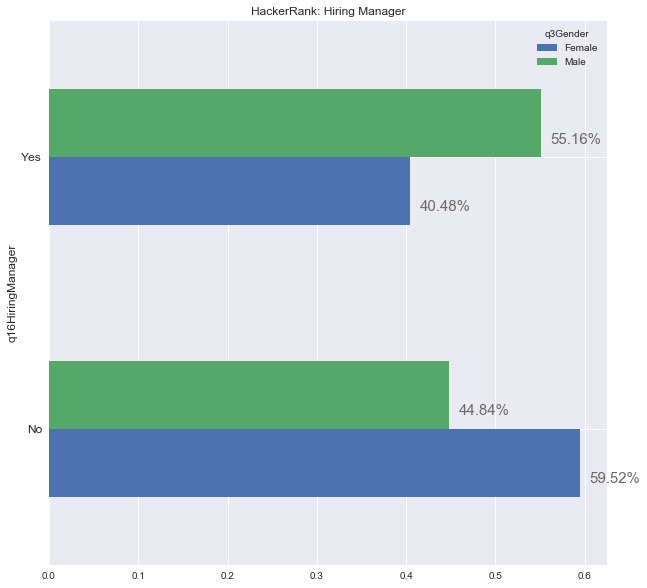

In [115]:
## HackerRank Hiring Manager

ax = hr_gender_dev.groupby("q3Gender")['q16HiringManager'].value_counts(normalize=True).unstack(0).plot(kind='barh',figsize=(10,10), title="HackerRank: Hiring Manager")

fig = ax.get_figure()

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar labels using above list
total = sum(totals)

# set individual bar labels using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_width()+.01, i.get_y()+0.05, \
            str(round((i.get_width()*100), 2))+'%', fontsize=15,
                color='dimgrey')
    
name = "HR_hiring-manager_barplot.jpg"
save_location = save_images + "\\" + name
fig.savefig(save_location)

##### Men are more likely to be hiring managers than women (55%, 41%). 

### 3.2. GitHub

#### 3.2.3. GH: Student/Employee Ratio

In [116]:
print("Women  \n \n", gh_female["EMPLOYMENT.STATUS"].value_counts(normalize=True)*100, sep="")

Women  
 
Employed full time                                            64.00%
Full time student                                             19.20%
Employed part time                                             8.80%
Other - please describe                                        4.00%
Temporarily not working                                        3.20%
Retired or permanently not working (e.g. due to disability)    0.80%
Name: EMPLOYMENT.STATUS, dtype: float64


In [117]:
print("Men \n \n",gh_male["EMPLOYMENT.STATUS"].value_counts(normalize=True)*100, sep="")

Men 
 
Employed full time                                            64.84%
Full time student                                             18.13%
Employed part time                                             5.88%
Temporarily not working                                        5.85%
Other - please describe                                        3.34%
Retired or permanently not working (e.g. due to disability)    1.77%
Not provided                                                   0.21%
Name: EMPLOYMENT.STATUS, dtype: float64


### RQ3b: To what extent do women mentor others in online coding communities?

#### 3.3. StackOverflow

#### 3.3.1 SO: Interested in SO developing a peer mentoring tool?

In [118]:
print("Women  \n \n", so_female["HypotheticalTools1"].value_counts(normalize=True)*100, sep="")

Women  
 
Somewhat interested       29.02%
Very interested           20.77%
A little bit interested   17.52%
Not at all interested     16.60%
Extremely interested      13.17%
Not provided               2.93%
Name: HypotheticalTools1, dtype: float64


In [119]:
print("Men \n \n", so_male["HypotheticalTools1"].value_counts(normalize=True)*100, sep="")

Men 
 
Somewhat interested       29.71%
Not at all interested     19.71%
A little bit interested   19.11%
Very interested           18.21%
Extremely interested      10.00%
Not provided               3.26%
Name: HypotheticalTools1, dtype: float64


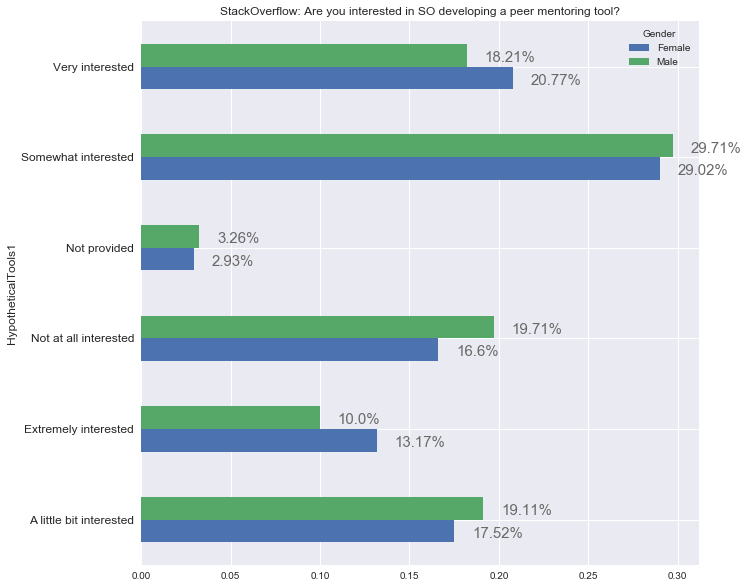

In [120]:
## Interested in SO developing a peer mentoring tool?

ax = so_gender.groupby("Gender")['HypotheticalTools1'].value_counts(normalize=True).unstack(0).plot(kind='barh',figsize=(10,10), title="StackOverflow: Are you interested in SO developing a peer mentoring tool?")

fig = ax.get_figure()

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar labels using above list
total = sum(totals)

# set individual bar labels using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_width()+.01, i.get_y()+0.05, \
            str(round((i.get_width()*100), 2))+'%', fontsize=15,
                color='dimgrey')
    
name = "SO_peer-mentoring-tool_barplot.jpg"
save_location = save_images + "\\" + name
fig.savefig(save_location)

##### Women significantly more likely to be Extremely interested (13%, 10%) and Very interested (21%, 18%) in a peer mentoring tool than men. Men more likely to be Not at all interested (20%, 17%).

#### 3.4. GitHub

#### 3.4.1 GH: Have you received help on OSS?

In [121]:
print("Women  \n \n", gh_female["RECEIVED.HELP"].value_counts(normalize=True)*100, sep="")

Women  
 
Yes            64.00%
No             35.20%
Not provided    0.80%
Name: RECEIVED.HELP, dtype: float64


In [122]:
print("Men \n \n", gh_male["RECEIVED.HELP"].value_counts(normalize=True)*100, sep="")

Men 
 
Yes            73.63%
No             26.04%
Not provided    0.32%
Name: RECEIVED.HELP, dtype: float64


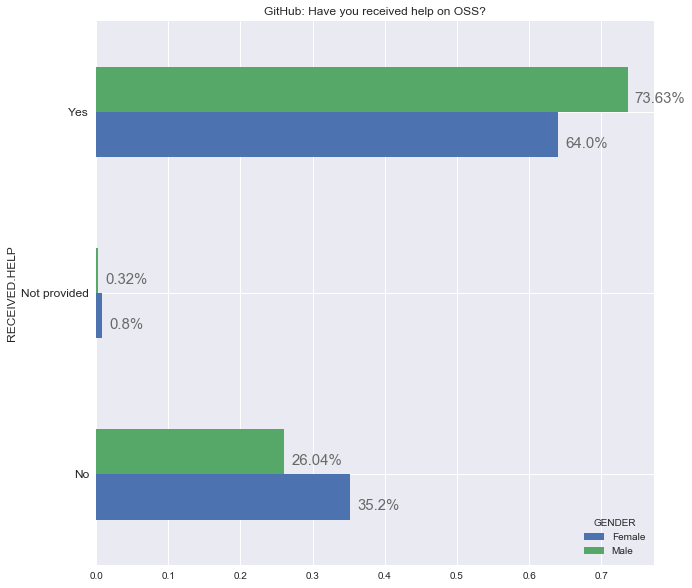

In [123]:
## GH: Received help

ax = gh_gender.groupby("GENDER")['RECEIVED.HELP'].value_counts(normalize=True).unstack(0).plot(kind='barh',figsize=(10,10), title="GitHub: Have you received help on OSS?")

fig = ax.get_figure()

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar labels using above list
total = sum(totals)

# set individual bar labels using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_width()+.01, i.get_y()+0.05, \
            str(round((i.get_width()*100), 2))+'%', fontsize=15,
                color='dimgrey')
    
name = "GH_received-help_barplot.jpg"
save_location = save_images + "\\" + name
fig.savefig(save_location)

##### Men significantly to have received help on OSS than women (74%, 64%).

#### 3.4.2 GH: How did you find someone to help you?

In [124]:
print("Women  \n \n", gh_female["FIND.HELPER"].value_counts(normalize=True)*100, sep="")

Women  
 
Not provided                                                                                                     36.80%
I asked for help in a public forum (e.g. in a GitHub Issue, project mailing list, etc.) and someone responded.   35.20%
I asked a specific person for help.                                                                              20.80%
Other - Please describe                                                                                           4.00%
Someone offered me unsolicited help.                                                                              3.20%
Name: FIND.HELPER, dtype: float64


In [125]:
print("Men \n \n", gh_male["FIND.HELPER"].value_counts(normalize=True)*100, sep="")

Men 
 
I asked for help in a public forum (e.g. in a GitHub Issue, project mailing list, etc.) and someone responded.   54.00%
Not provided                                                                                                     27.31%
I asked a specific person for help.                                                                               9.83%
Someone offered me unsolicited help.                                                                              7.32%
Other - Please describe                                                                                           1.54%
Name: FIND.HELPER, dtype: float64


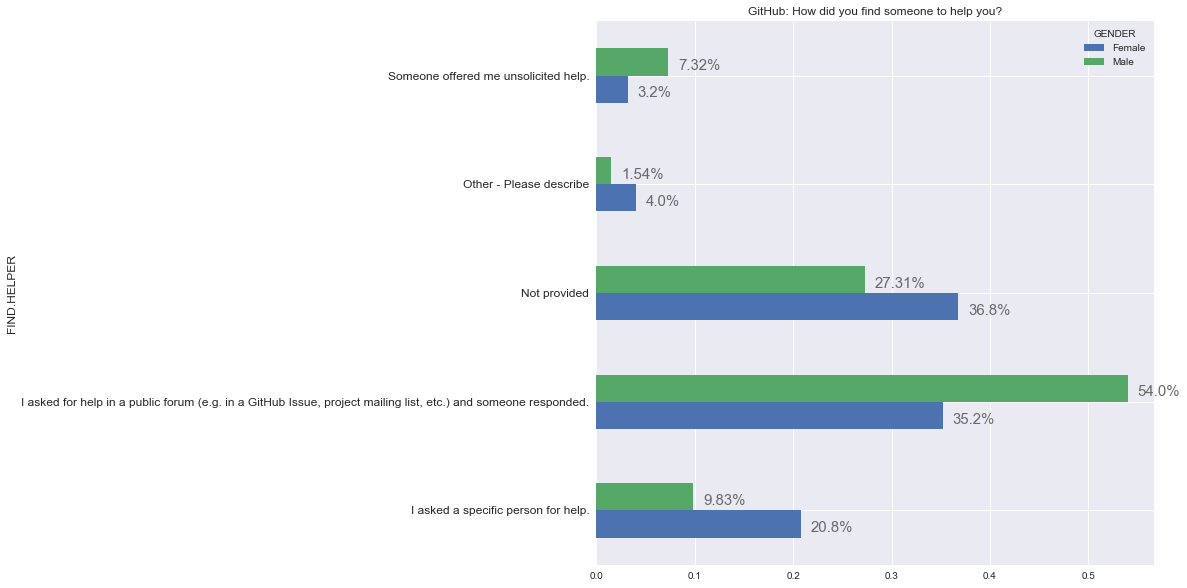

In [126]:
## GH: Received help - how

ax = gh_gender.groupby("GENDER")['FIND.HELPER'].value_counts(normalize=True).unstack(0).plot(kind='barh',figsize=(10,10), title="GitHub: How did you find someone to help you?")

fig = ax.get_figure()

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar labels using above list
total = sum(totals)

# set individual bar labels using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_width()+.01, i.get_y()+0.05, \
            str(round((i.get_width()*100), 2))+'%', fontsize=15,
                color='dimgrey')
    
name = "GH_received-help-how_barplot.jpg"
save_location = save_images + "\\" + name
fig.savefig(save_location)

##### Men significantly to have asked for help in a public forum (54%, 35%), or received unsolicited help on OSS than women (7%, 3%), and women more than twice as likely to have asked a specific person for help (21%, 10%).

#### 3.4.3 GH: What was your prior relationship with your helper?

In [127]:
print("Women  \n \n", gh_female["HELPER.PRIOR.RELATIONSHIP"].value_counts(normalize=True)*100, sep="")

Women  
 
Not provided                                                                               36.80%
Total strangers, I didn't know of them previously.                                         24.00%
I knew of them through their contributions to projects, but didn't know them personally.   15.20%
We knew each other well.                                                                   15.20%
We knew each other a little.                                                                8.80%
Name: HELPER.PRIOR.RELATIONSHIP, dtype: float64


In [128]:
print("Men \n \n", gh_male["HELPER.PRIOR.RELATIONSHIP"].value_counts(normalize=True)*100, sep="")

Men 
 
Total strangers, I didn't know of them previously.                                         40.95%
Not provided                                                                               27.37%
I knew of them through their contributions to projects, but didn't know them personally.   21.38%
We knew each other a little.                                                                5.34%
We knew each other well.                                                                    4.96%
Name: HELPER.PRIOR.RELATIONSHIP, dtype: float64


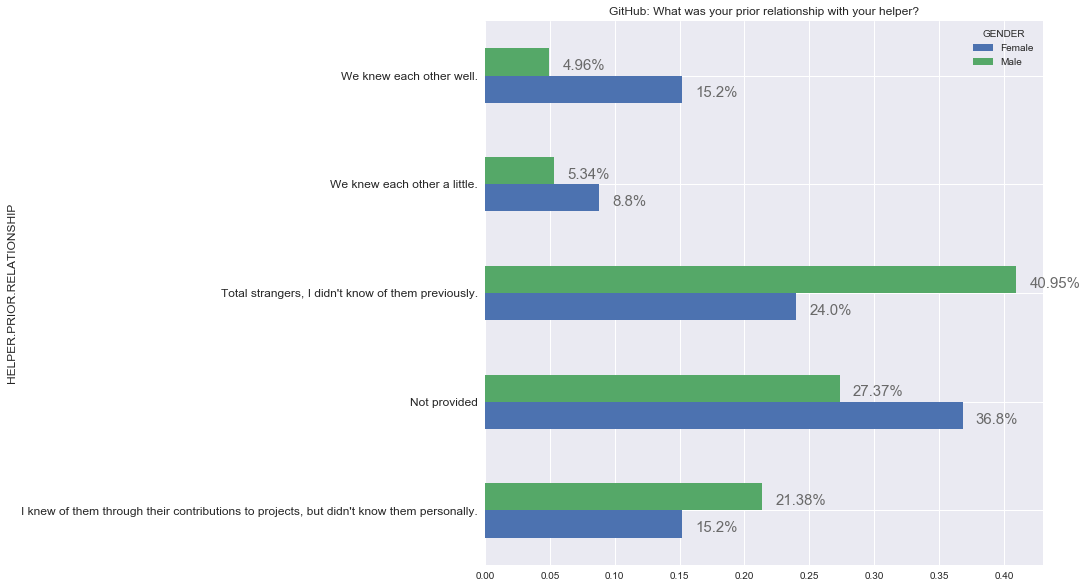

In [129]:
## GH: Received help - source

ax = gh_gender.groupby("GENDER")['HELPER.PRIOR.RELATIONSHIP'].value_counts(normalize=True).unstack(0).plot(kind='barh',figsize=(10,10), title="GitHub: What was your prior relationship with your helper?")

fig = ax.get_figure()

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar labels using above list
total = sum(totals)

# set individual bar labels using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_width()+.01, i.get_y()+0.05, \
            str(round((i.get_width()*100), 2))+'%', fontsize=15,
                color='dimgrey')
    
name = "GH_received-help-who_barplot.jpg"
save_location = save_images + "\\" + name
fig.savefig(save_location)

##### Women significantly more likely to receive help from someone they knew well (15%, 5%) or knew a little (9%, 5%) than men. Men significantly more likely to receive help from "total strangers" (41%, 24%) or someone they knew from a project, but not personally (21%, 15%).

#### 3.4.4 GH: What did you receive help with?

In [130]:
print("Women  \n \n", gh_female["RECEIVED.HELP.TYPE"].value_counts(normalize=True)*100, sep="")

Women  
 
Not provided                                                                                         36.80%
Writing code or otherwise implementing ideas.                                                        32.80%
Installing or using an application.                                                                  19.20%
Understanding community norms (e.g. how to submit a contribution, how to communicate effectively).    8.00%
Other (please describe)                                                                               2.40%
Introductions to other people                                                                         0.80%
Name: RECEIVED.HELP.TYPE, dtype: float64


In [131]:
print("Men \n \n", gh_male["RECEIVED.HELP.TYPE"].value_counts(normalize=True)*100, sep="")

Men 
 
Writing code or otherwise implementing ideas.                                                        42.90%
Not provided                                                                                         27.43%
Installing or using an application.                                                                  21.11%
Understanding community norms (e.g. how to submit a contribution, how to communicate effectively).    4.58%
Other (please describe)                                                                               3.66%
Introductions to other people                                                                         0.32%
Name: RECEIVED.HELP.TYPE, dtype: float64


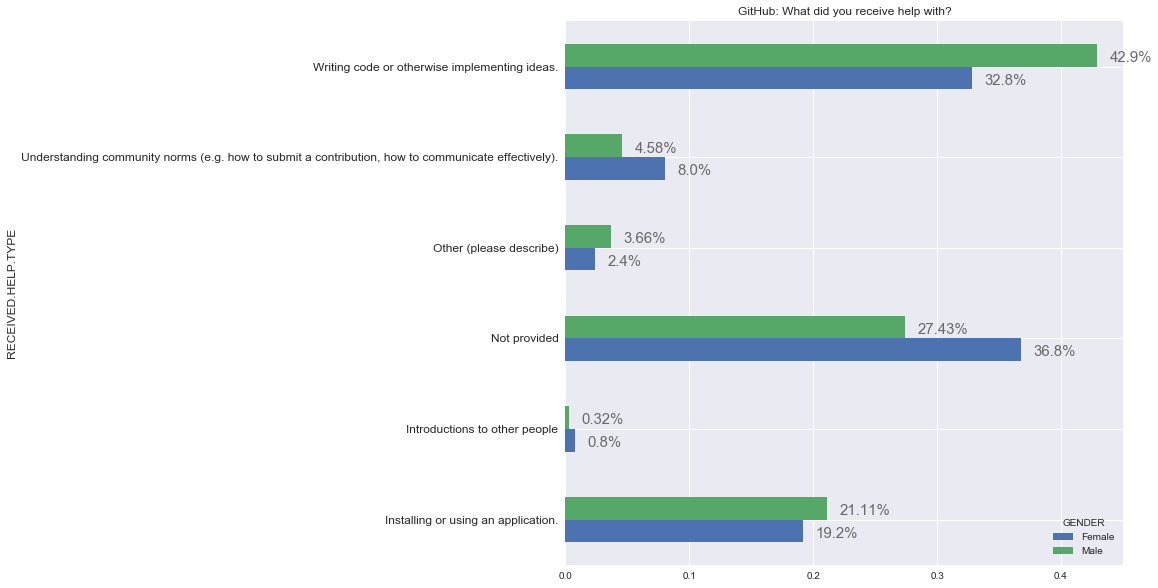

In [132]:
## GH: Received help - topic

ax = gh_gender.groupby("GENDER")['RECEIVED.HELP.TYPE'].value_counts(normalize=True).unstack(0).plot(kind='barh',figsize=(10,10), title="GitHub: What did you receive help with?")

fig = ax.get_figure()

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar labels using above list
total = sum(totals)

# set individual bar labels using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_width()+.01, i.get_y()+0.05, \
            str(round((i.get_width()*100), 2))+'%', fontsize=15,
                color='dimgrey')
    
name = "GH_received-help-topic_barplot.jpg"
save_location = save_images + "\\" + name
fig.savefig(save_location)

##### Women significantly more likely to receive help about understanding community norms (8%, 5%). Other than that women didn't provide the topic of the help here. 

#### 3.4.5. GH: Have you ever provided help for another person on an open source project?

In [133]:
print("Women  \n \n", gh_female["PROVIDED.HELP"].value_counts(normalize=True)*100, sep="")

Women  
 
Yes   57.60%
No    42.40%
Name: PROVIDED.HELP, dtype: float64


In [134]:
print("Men \n \n", gh_male["PROVIDED.HELP"].value_counts(normalize=True)*100, sep="")

Men 
 
Yes            75.14%
No             24.74%
Not provided    0.12%
Name: PROVIDED.HELP, dtype: float64


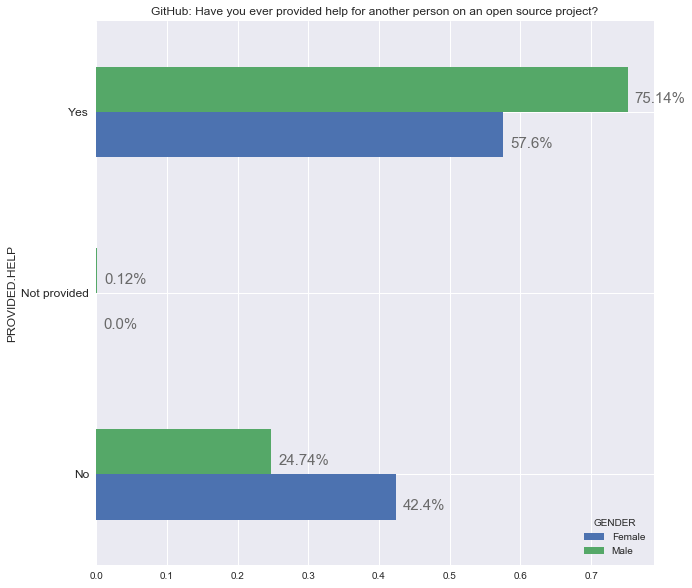

In [135]:
## GH: Given help

ax = gh_gender.groupby("GENDER")['PROVIDED.HELP'].value_counts(normalize=True).unstack(0).plot(kind='barh',figsize=(10,10), title="GitHub: Have you ever provided help for another person on an open source project?")

fig = ax.get_figure()

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar labels using above list
total = sum(totals)

# set individual bar labels using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_width()+.01, i.get_y()+0.05, \
            str(round((i.get_width()*100), 2))+'%', fontsize=15,
                color='dimgrey')
    
name = "GH_given-help_barplot.jpg"
save_location = save_images + "\\" + name
fig.savefig(save_location)

##### Men more likely to provide help (75%, 58%) than women.

#### 3.4.6. GH: How did you find someone to help?

In [136]:
print("Women  \n \n", gh_female["FIND.HELPEE"].value_counts(normalize=True)*100, sep="")

Women  
 
Not provided                                                                                                  44.80%
They asked for help in a public forum (e.g. in a GitHub Issue, project mailing list, etc.) and I responded.   30.40%
They asked me directly for help.                                                                              18.40%
I reached out to them to offer unsolicited help.                                                               4.00%
Other (please describe)                                                                                        2.40%
Name: FIND.HELPEE, dtype: float64


In [137]:
print("Men \n \n", gh_male["FIND.HELPEE"].value_counts(normalize=True)*100, sep="")

Men 
 
They asked for help in a public forum (e.g. in a GitHub Issue, project mailing list, etc.) and I responded.   48.48%
Not provided                                                                                                  25.80%
They asked me directly for help.                                                                              14.17%
I reached out to them to offer unsolicited help.                                                              10.89%
Other (please describe)                                                                                        0.65%
Name: FIND.HELPEE, dtype: float64


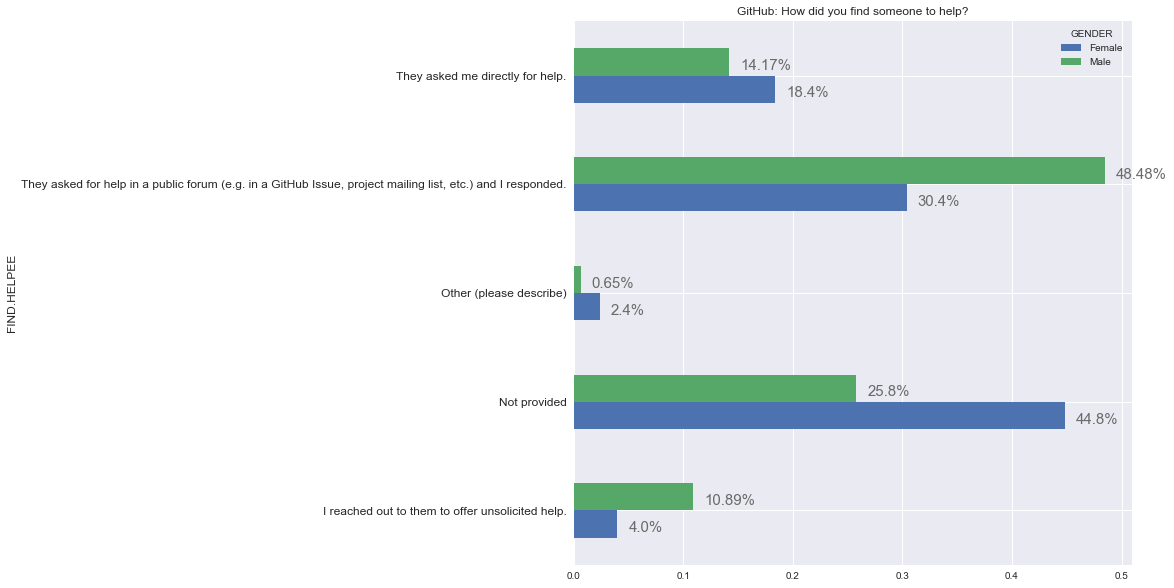

In [138]:
## GH: Given help - how

ax = gh_gender.groupby("GENDER")['FIND.HELPEE'].value_counts(normalize=True).unstack(0).plot(kind='barh',figsize=(10,10), title="GitHub: How did you find someone to help?")

fig = ax.get_figure()

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar labels using above list
total = sum(totals)

# set individual bar labels using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_width()+.01, i.get_y()+0.05, \
            str(round((i.get_width()*100), 2))+'%', fontsize=15,
                color='dimgrey')
    
name = "GH_given-help-how_barplot.jpg"
save_location = save_images + "\\" + name
fig.savefig(save_location)

##### Men more likely to provide unsolicited help (11%, 4%) than women, or provide responses in a public forum (49%, 30%). women more likely to give help when asked directly (18%, 14%), other (2.4%), or not provided (45%).

#### 3.4.7. GH: What was your prior relationship with your helpee?

In [139]:
print("Women  \n \n", gh_female["HELPEE.PRIOR.RELATIONSHIP"].value_counts(normalize=True)*100, sep="")

Women  
 
Not provided                                                                               44.80%
Total strangers, I didn't know of them previously.                                         27.20%
We knew each other  a little.                                                              13.60%
We knew each other well.                                                                    8.00%
I knew of them through their contributions to projects, but didn't know them personally.    6.40%
Name: HELPEE.PRIOR.RELATIONSHIP, dtype: float64


In [140]:
print("Men \n \n", gh_male["HELPEE.PRIOR.RELATIONSHIP"].value_counts(normalize=True)*100, sep="")

Men 
 
Total strangers, I didn't know of them previously.                                         52.38%
Not provided                                                                               25.75%
I knew of them through their contributions to projects, but didn't know them personally.    7.79%
We knew each other well.                                                                    7.38%
We knew each other  a little.                                                               6.70%
Name: HELPEE.PRIOR.RELATIONSHIP, dtype: float64


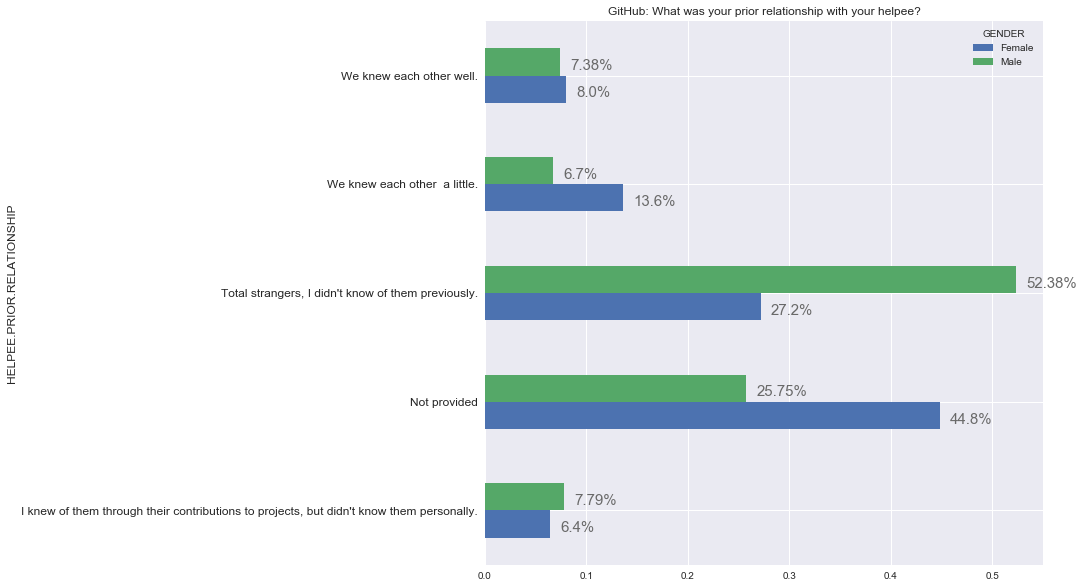

In [141]:
## GH: Given help - relationship

ax = gh_gender.groupby("GENDER")['HELPEE.PRIOR.RELATIONSHIP'].value_counts(normalize=True).unstack(0).plot(kind='barh',figsize=(10,10), title="GitHub: What was your prior relationship with your helpee?")

fig = ax.get_figure()

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar labels using above list
total = sum(totals)

# set individual bar labels using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_width()+.01, i.get_y()+0.05, \
            str(round((i.get_width()*100), 2))+'%', fontsize=15,
                color='dimgrey')
    
name = "GH_given-help-who_barplot.jpg"
save_location = save_images + "\\" + name
fig.savefig(save_location)

##### Women significantly more likely to give help to someone they knew a little (14%, 7%) than men. Men significantly more likely to receive help from "total strangers" (52%, 27%).

#### 3.4.8. GH: What did you give help with?

In [142]:
print("Women  \n \n", gh_female["PROVIDED.HELP.TYPE"].value_counts(normalize=True)*100, sep="")

Women  
 
Not provided                                                                                         44.80%
Writing code or otherwise implementing ideas.                                                        26.40%
Installing or using an application.                                                                  20.80%
Understanding community norms (e.g. how to submit a contribution, how to communicate effectively).    6.40%
Other (please describe)                                                                               1.60%
Name: PROVIDED.HELP.TYPE, dtype: float64


In [143]:
print("Men \n \n", gh_male["PROVIDED.HELP.TYPE"].value_counts(normalize=True)*100, sep="")

Men 
 
Writing code or otherwise implementing ideas.                                                        42.19%
Installing or using an application.                                                                  26.90%
Not provided                                                                                         25.78%
Other (please describe)                                                                               2.66%
Understanding community norms (e.g. how to submit a contribution, how to communicate effectively).    2.27%
Introductions to other people.                                                                        0.21%
Name: PROVIDED.HELP.TYPE, dtype: float64


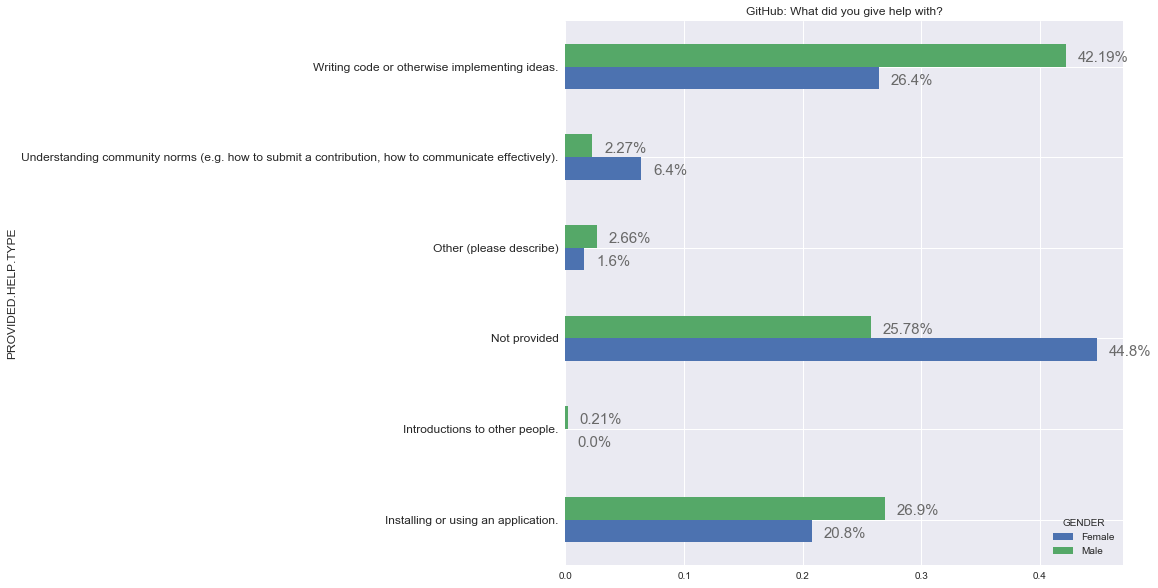

In [144]:
## GH: Given help - topic

ax = gh_gender.groupby("GENDER")['PROVIDED.HELP.TYPE'].value_counts(normalize=True).unstack(0).plot(kind='barh',figsize=(10,10), title="GitHub: What did you give help with?")

fig = ax.get_figure()

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar labels using above list
total = sum(totals)

# set individual bar labels using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_width()+.01, i.get_y()+0.05, \
            str(round((i.get_width()*100), 2))+'%', fontsize=15,
                color='dimgrey')
    
name = "GH_given-help-topic_barplot.jpg"
save_location = save_images + "\\" + name
fig.savefig(save_location)

##### Women significantly more likely to give help about understanding community norms (6%, 2%). Other than that women didn't provide the topic of the help here. 